In [125]:
import pandas as pd
import numpy as np
import seaborn  as sns  
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from xgboost import XGBRegressor, XGBClassifier
from sklearn.ensemble import AdaBoostRegressor, AdaBoostClassifier 
from sklearn.ensemble import  GradientBoostingRegressor, GradientBoostingClassifier
from sklearn.linear_model import  Ridge 
from sklearn.linear_model import  Lasso 
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import explained_variance_score
import statsmodels.api as sm
from sklearn.preprocessing import QuantileTransformer

from sklearn.preprocessing import PowerTransformer
from sklearn.metrics import accuracy_score, confusion_matrix, r2_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt 
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.compose import ColumnTransformer
from sklearn.svm import SVC, SVR

In [45]:
avocado = pd.read_csv(r"C:\Users\NIRANKARI\Documents\avocado.csv")

# "C:\Users\NIRANKARI\Documents\avocado.csv" OR "C:\Users\Dell\Documents\avocado.csv"

In [46]:
#avocado = avocado.drop(['Unnamed: 0'], axis=1)
avocado['Date'] = pd.to_datetime(avocado['Date'])
avocado['Month'] = avocado['Date'].dt.month
avocado['Week'] = avocado['Date'].dt.week

In [47]:
avocado1 = avocado

In [48]:
avocado2 = avocado1.drop(['Date','Unnamed: 0'], axis=1)

In [50]:
avocado2

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Week
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12,52
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12,51
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12,50
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,12,49
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11,48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico,2,5
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico,1,4
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico,1,3
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico,1,2


# heatmap correlation

<Axes: >

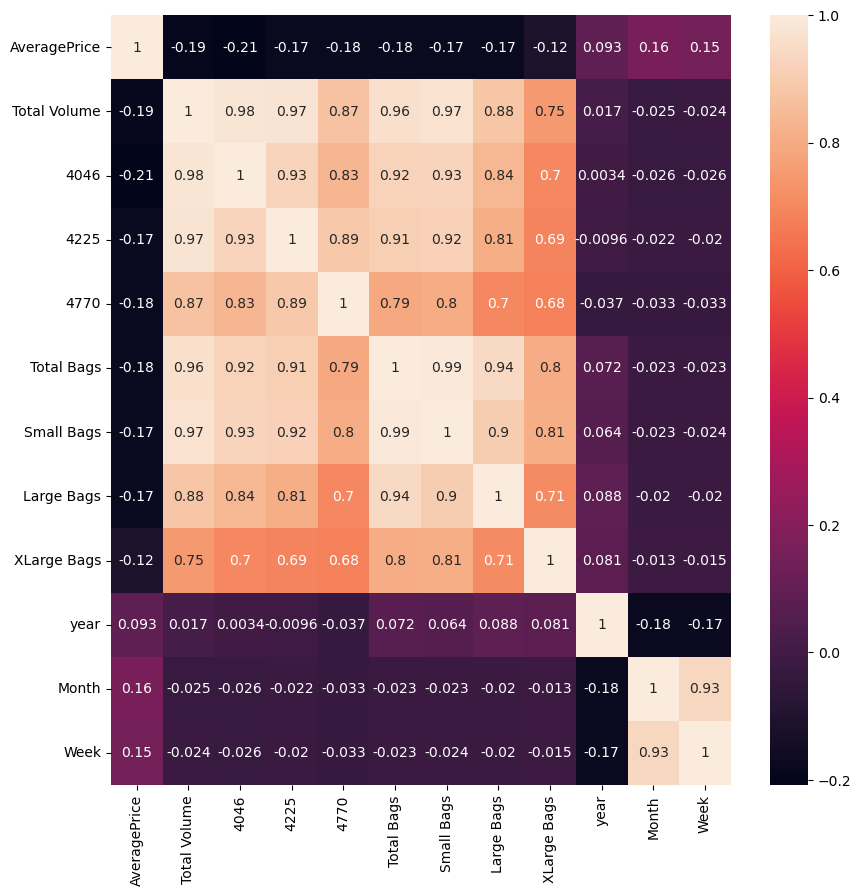

In [7]:
plt.figure(figsize=(10,10))
sns.heatmap(avocado2.corr(), annot=True)

# Missing Values

In [8]:
avocado2.isnull().sum()

AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
Month           0
Week            0
dtype: int64

In [9]:
avocado2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   AveragePrice  18249 non-null  float64
 1   Total Volume  18249 non-null  float64
 2   4046          18249 non-null  float64
 3   4225          18249 non-null  float64
 4   4770          18249 non-null  float64
 5   Total Bags    18249 non-null  float64
 6   Small Bags    18249 non-null  float64
 7   Large Bags    18249 non-null  float64
 8   XLarge Bags   18249 non-null  float64
 9   type          18249 non-null  object 
 10  year          18249 non-null  int64  
 11  region        18249 non-null  object 
 12  Month         18249 non-null  int64  
 13  Week          18249 non-null  int64  
dtypes: float64(9), int64(3), object(2)
memory usage: 1.9+ MB


# Data Analysis

# Total sale on basis of Areas

<Axes: xlabel='Total Volume', ylabel='region'>

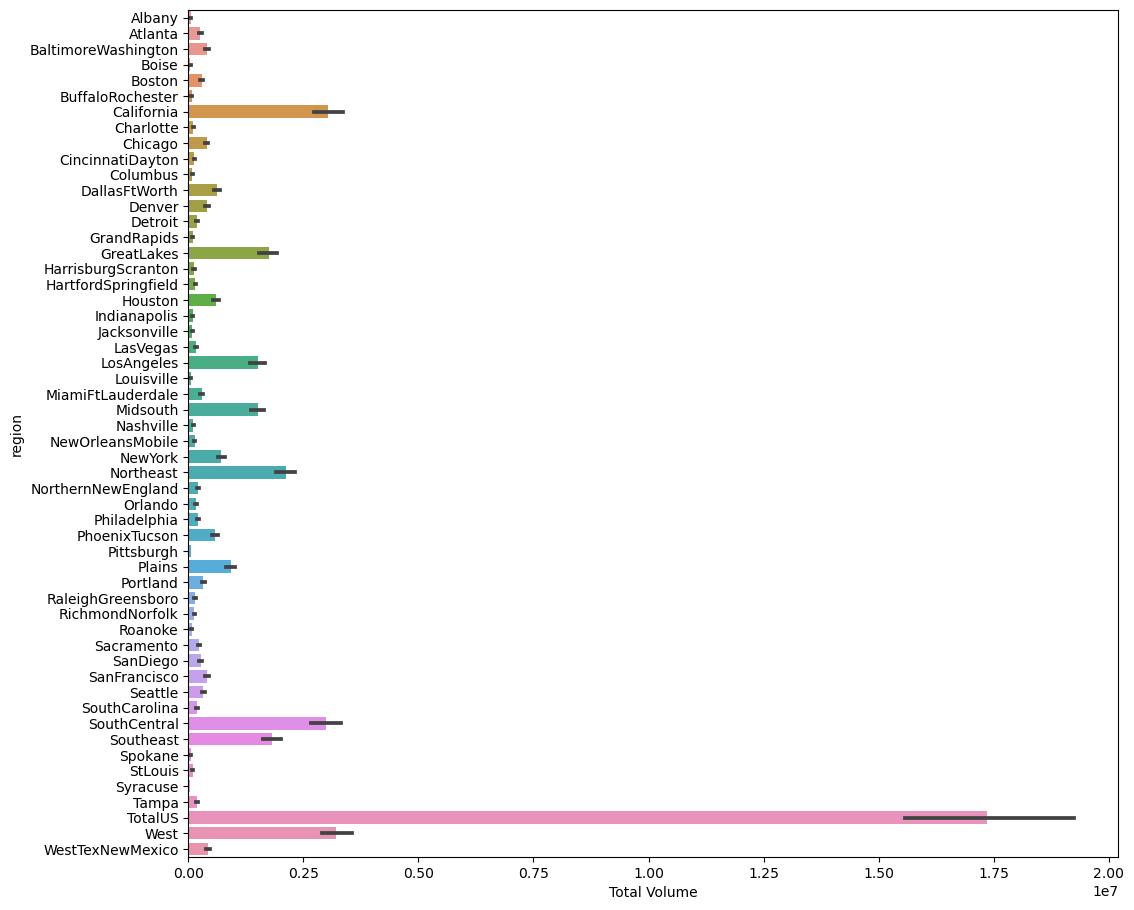

In [10]:
plt.figure(figsize=(12,11))
sns.barplot(data = avocado2, x ='Total Volume', y = 'region' )

# sale in Total US is higher as compare to other region

# sale of different product area wise

# Non Organic + Large(4225)

<Axes: xlabel='4225', ylabel='region'>

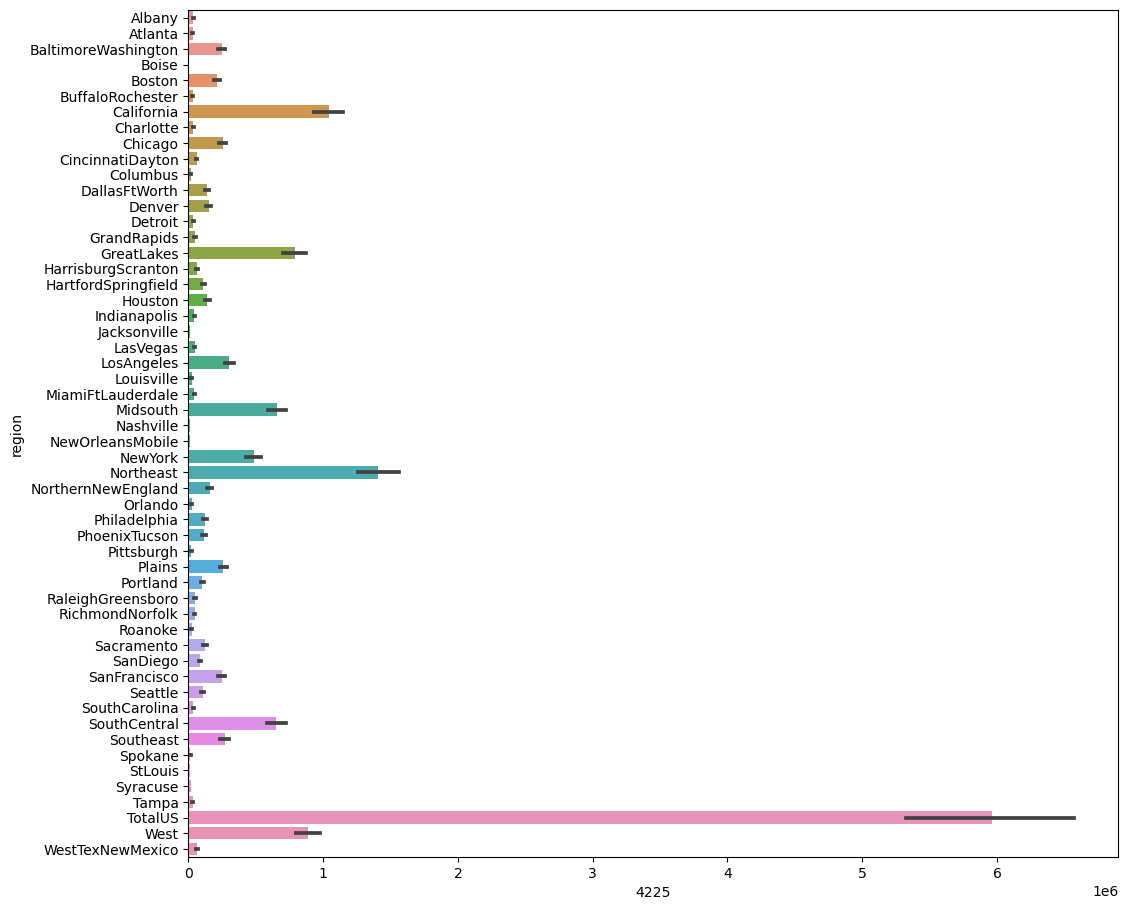

In [11]:
plt.figure(figsize=(12,11))
sns.barplot(data = avocado2, x ='4225', y = 'region' )

# sale of large bags in Total us is high as compares to other regions 
# second one is Northeast whose turnover is lower than totalus but higher than other region

# Non Organic + Small/Medium(4046)

<Axes: xlabel='4046', ylabel='region'>

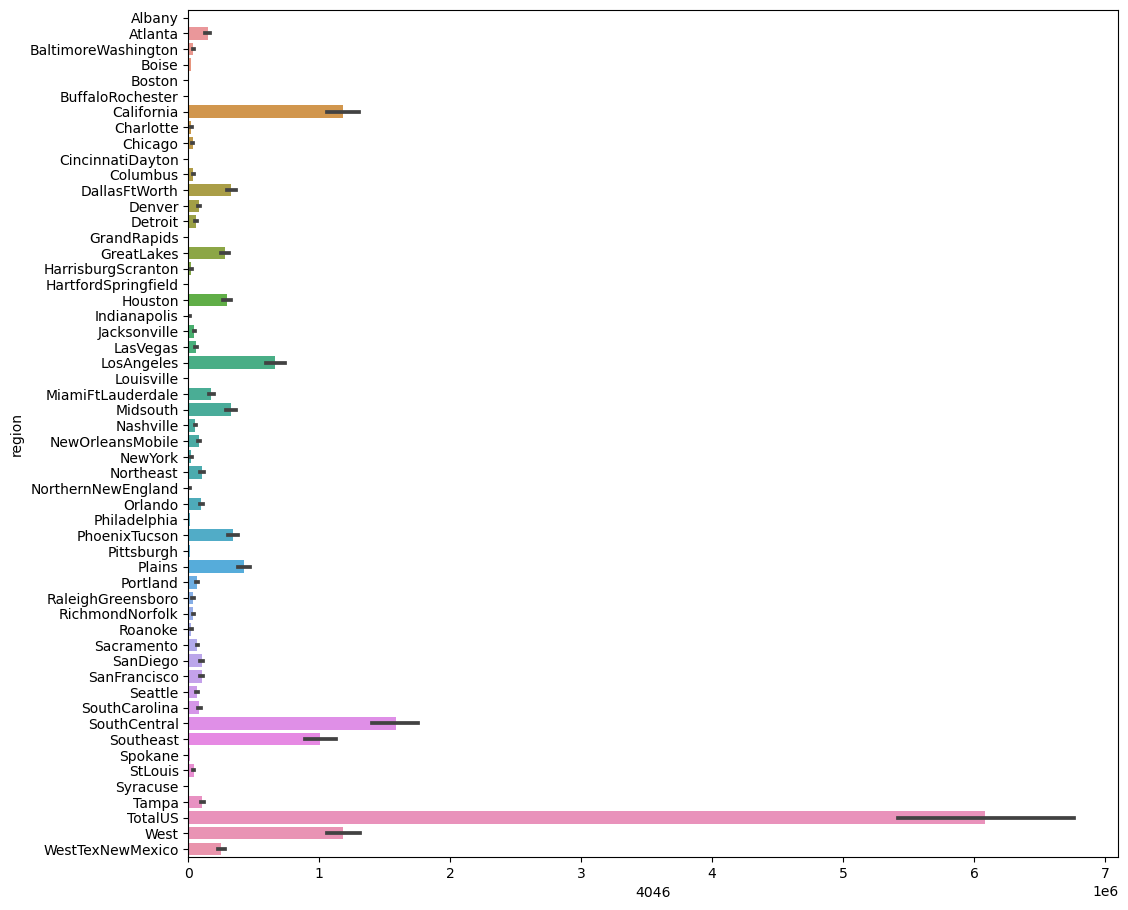

In [12]:
plt.figure(figsize=(12,11))
sns.barplot(data = avocado2, x ='4046', y = 'region' )

# sale of Small/Medium bags in Total us is high as compares to other regions 
# second one is southcentral whose turnover is lower than totalus but higher than other region

# Non Organic + Extra Large(4770)

<Axes: xlabel='4770', ylabel='region'>

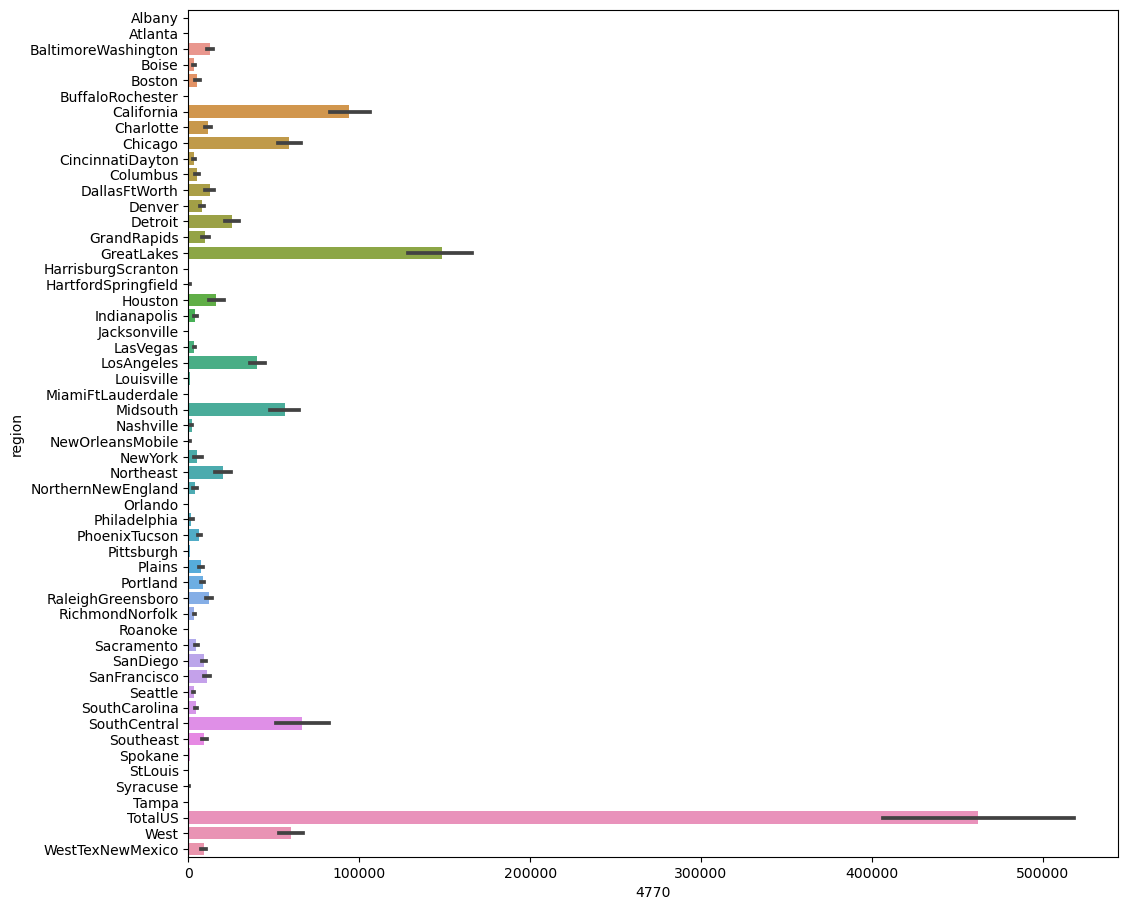

In [13]:
plt.figure(figsize=(12,11))
sns.barplot(data = avocado2, x ='4770', y = 'region' )

# sale of Extra Large bags in Total us is high as compares to other regions 
# second one is Greatlakes whose turnover is lower than totalus but higher than other region

<Axes: xlabel='Total Bags', ylabel='region'>

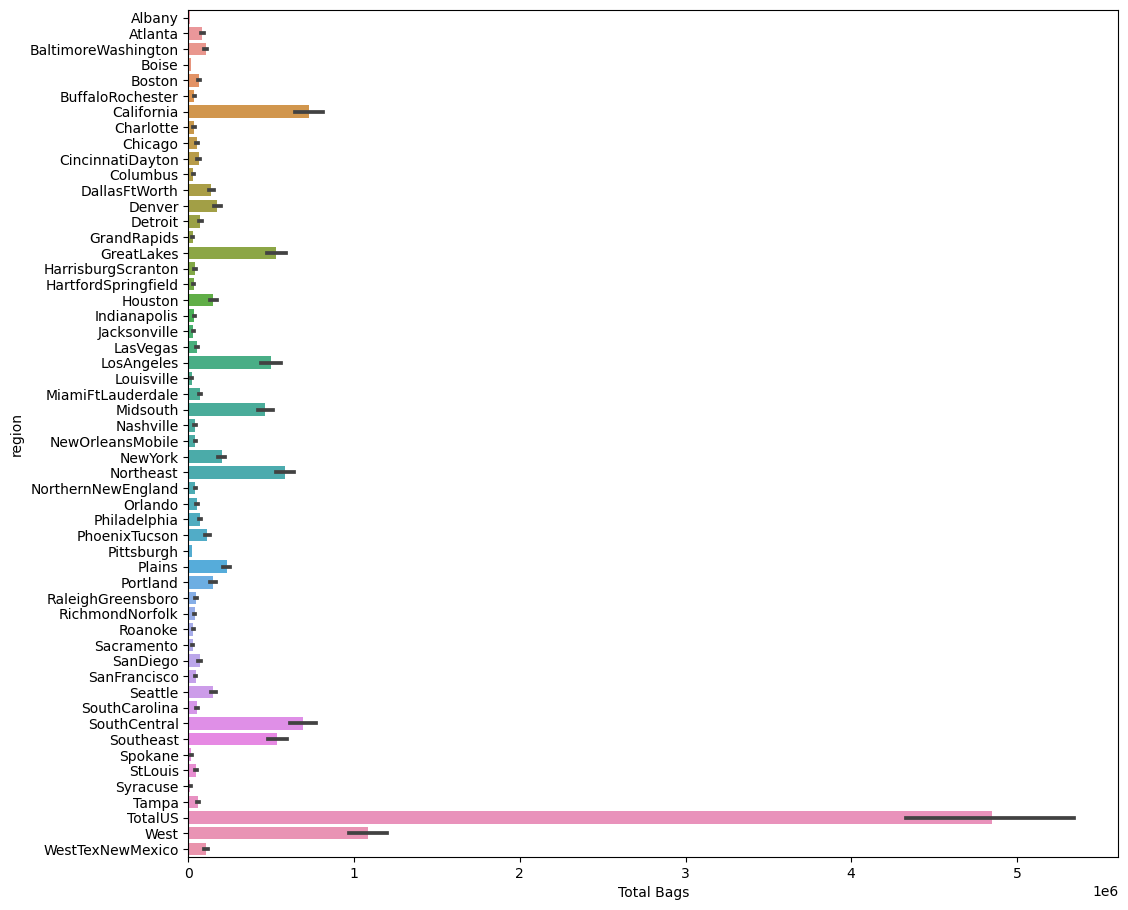

In [14]:
plt.figure(figsize=(12,11))
sns.barplot(data = avocado2, x ='Total Bags', y = 'region' )

# sale of Extra Large bags in Total us is high as compares to other regions 
# second one is Greatlakes whose turnover is lower than totalus but higher than other region

<Axes: xlabel='Small Bags', ylabel='region'>

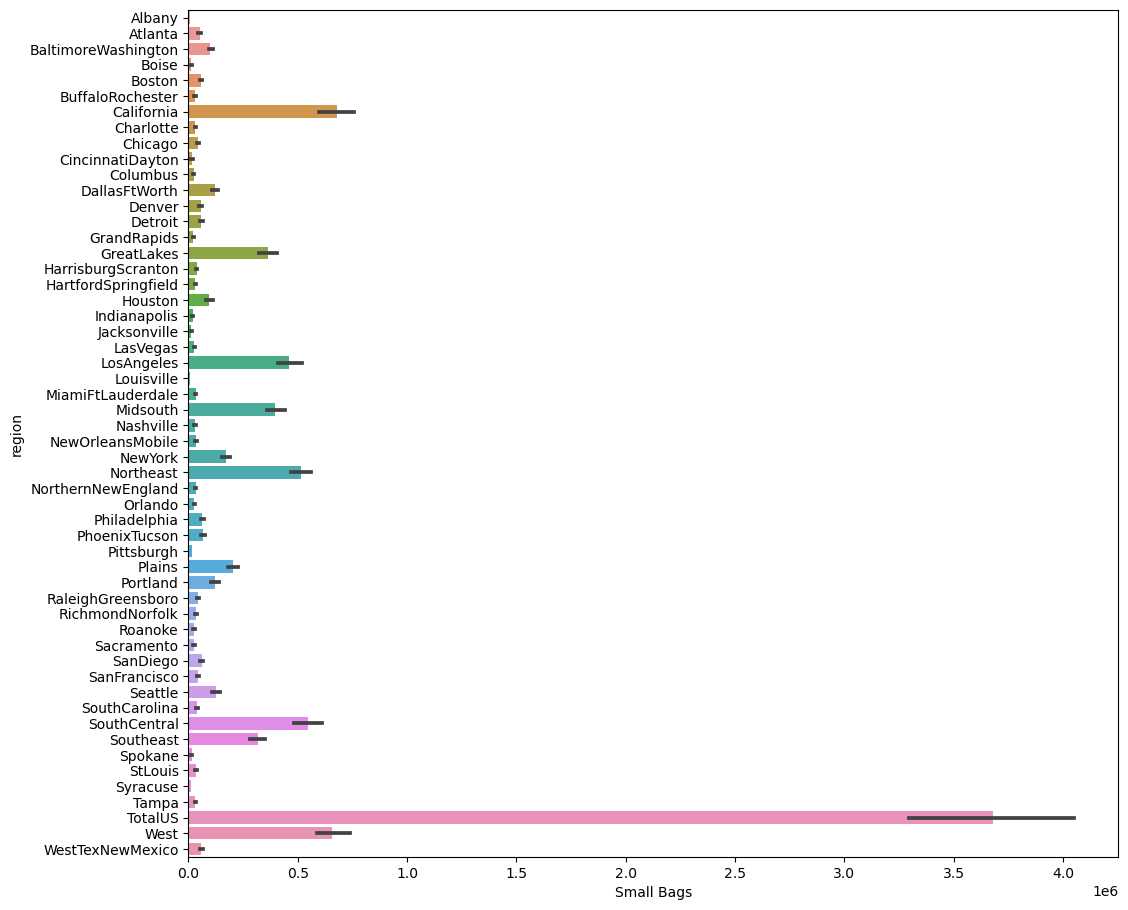

In [15]:
plt.figure(figsize=(12,11))
sns.barplot(data = avocado2, x ='Small Bags', y = 'region' )

# sale of small bags in Total us is high as compares to other regions 
# second one is california and west whose turnover is lower than totalus but higher than other region

In [16]:
# Large Bags

<Axes: xlabel='Large Bags', ylabel='region'>

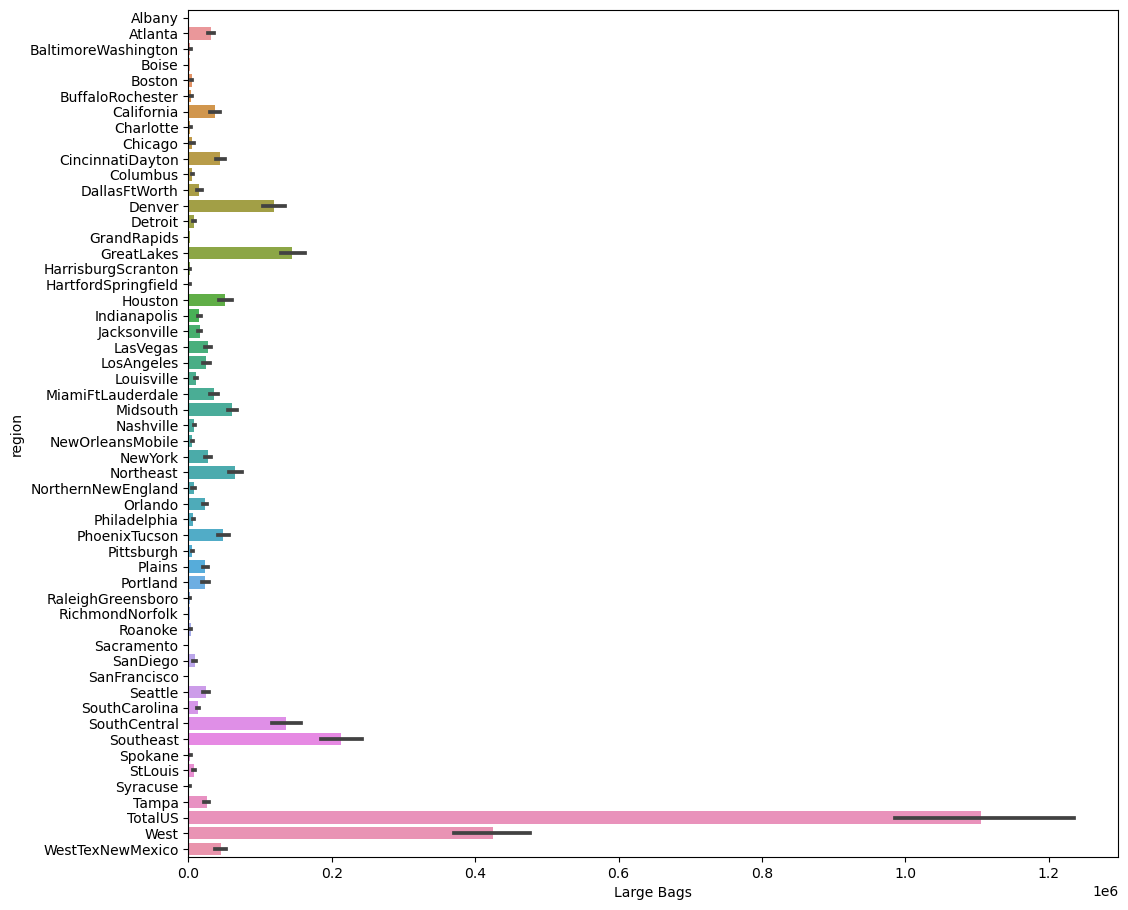

In [17]:
plt.figure(figsize=(12,11))
sns.barplot(data = avocado2, x ='Large Bags', y = 'region' )

# sale of Large bags in Total us is high as compares to other regions 
# second one is west whose turnover is lower than totalus but higher than other region

In [18]:
# extra Large Product sale area wise

<Axes: xlabel='XLarge Bags', ylabel='region'>

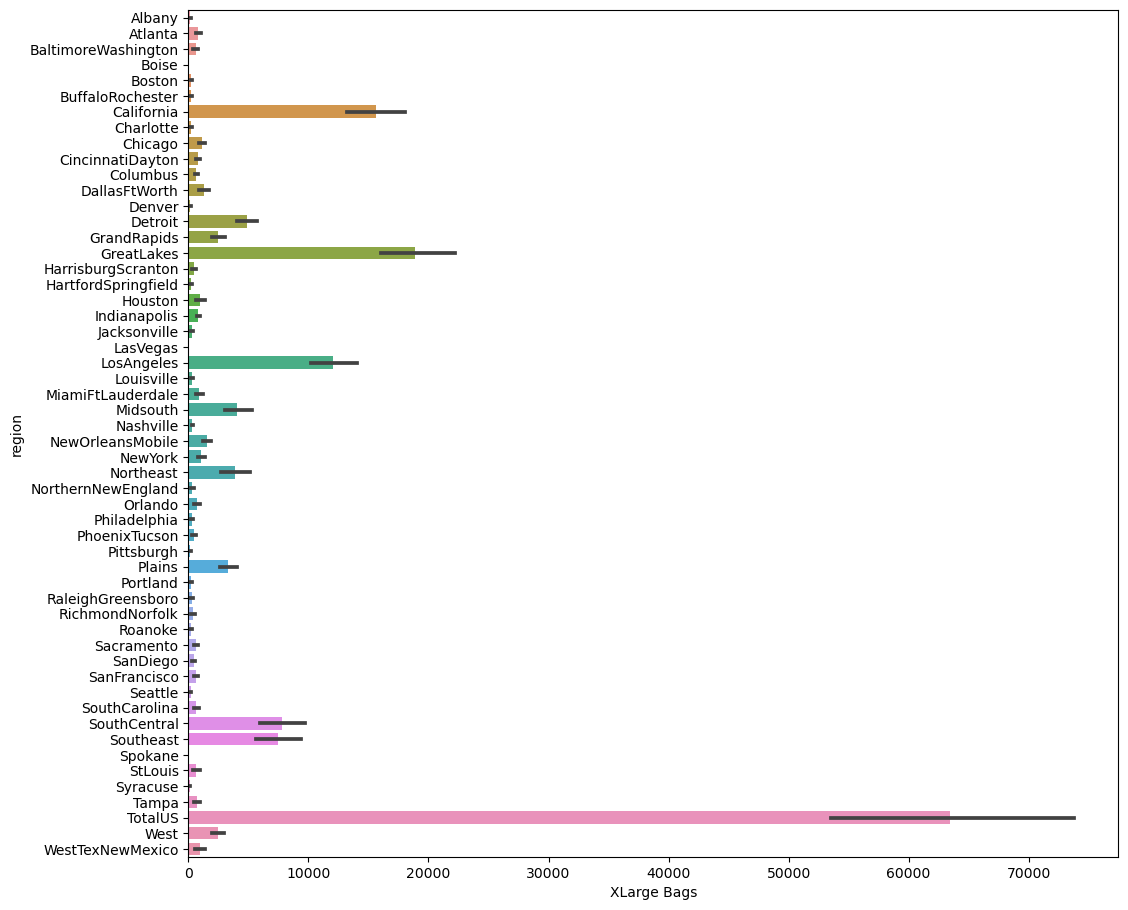

In [19]:
plt.figure(figsize=(12,11))
sns.barplot(data = avocado2, x ='XLarge Bags', y = 'region' )

# sale of XLarge bags in Total us is high as compares to other regions 
# second one is GreatLakes and california whose turnover is lower than totalus but higher than other region

# On basis of Year

In [20]:
avocado2['Total Volume'].max()

62505646.52

In [21]:
avocado2['Total Volume'].min()

84.56

In [22]:
sale15 = avocado2[avocado2['year'] == 2015]
sale16 = avocado2[avocado2['year'] == 2016]
sale17 = avocado2[avocado2['year'] == 2017]
sale18 = avocado2[avocado2['year'] == 2018]

In [23]:
sale18['Month'].unique()

array([3, 2, 1], dtype=int64)

# Total Sale 

In [24]:
sum1 = sale15['Total Volume'].sum()
sum1

4385468662.04

In [25]:
sum2 = sale16['Total Volume'].sum()
sum2

4820889891.83

# increase in sale in percentage from 2015 to 2016

In [26]:
435421229.78999996 / 4385468662.04*100   

9.92872742562146

In [27]:
sum3 = sale17['Total Volume'].sum()
sum3

4934305699.27

# increase in sale in percentage from 2016 to 2017

In [28]:
113415807.44000053 / 4820889891.83 * 100

2.3525907038907317

# increase in sale in percentage from 2017 to 2018

In [29]:
sum4 = sale18['Total Volume'].sum()
sum4

1382738340.2600002

In [30]:
month1 = sale17[sale17['Month'] == 1]
month2 = sale17[sale17['Month'] == 2]
month3 = sale17[sale17['Month'] == 3]

In [31]:
sum1= month1['Total Volume'].sum()
sum2= month2['Total Volume'].sum()
sum3= month3['Total Volume'].sum()

In [32]:
sale17_3month = sum1 + sum2 + sum3
sale17_3month

1363703615.0

In [33]:
19034725.26000023 / 1363703615.0*100

1.3958110142576858

# Total Volume vs Years

<Axes: xlabel='year', ylabel='Total Volume'>

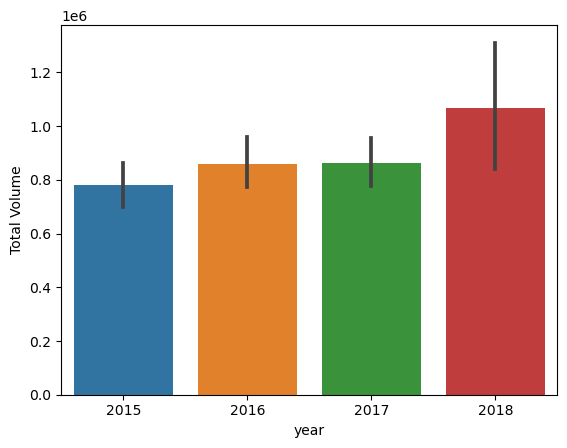

In [34]:

sns.barplot(data = avocado2, x ='year', y ='Total Volume')

# as you can see sale is only in 2016 and 2017 sale remained same 

In [35]:
avocado2.columns

Index(['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags',
       'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year', 'region',
       'Month', 'Week'],
      dtype='object')

<Axes: xlabel='year', ylabel='4046'>

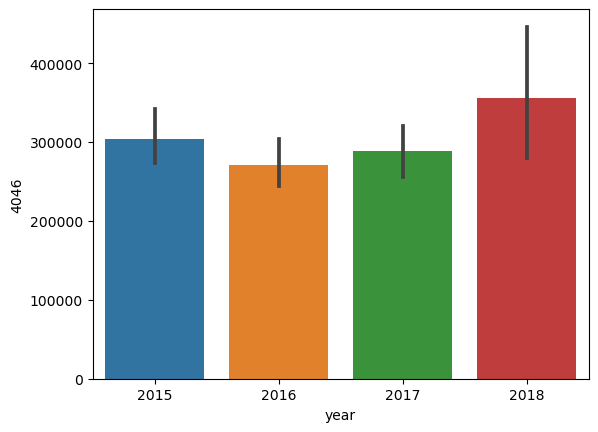

In [36]:
sns.barplot(data = avocado2, x ='year', y ='4046')

# 4046 is non organic and small/medium package

# sale of small/medium  is higher in year 2018 as compare to other countries

# sale dropped in year 2016 and 2017 

<Axes: xlabel='year', ylabel='4225'>

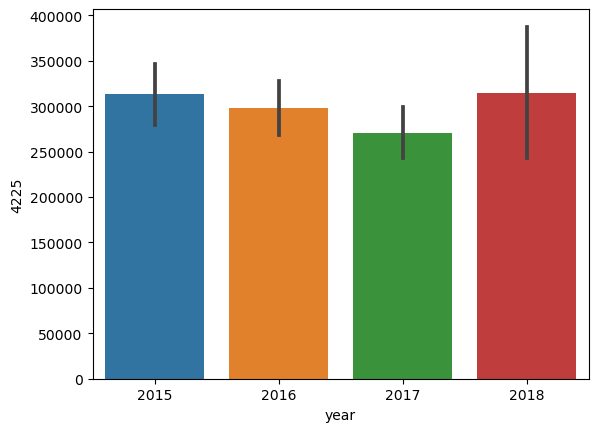

In [37]:
sns.barplot(data = avocado2, x ='year', y ='4225')

#  4225 is non organic and large package
# large packge is lower in 2016 and 2017 , and higher in year 2015 and 2018

<Axes: xlabel='year', ylabel='4770'>

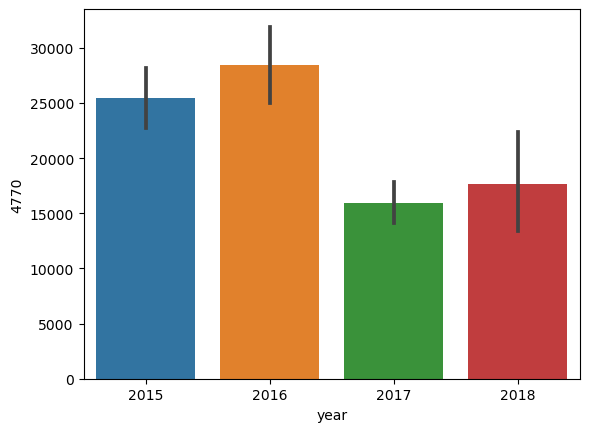

In [38]:
sns.barplot(data = avocado2, x ='year', y ='4770')

# 4770 is extra large package 

# sale of extra large in 2016 is higher

# sale of extra ;arge in 2017 is lower than other years

# Sale of Different bags in market

In [39]:
# Small Bags

<Axes: xlabel='year', ylabel='Small Bags'>

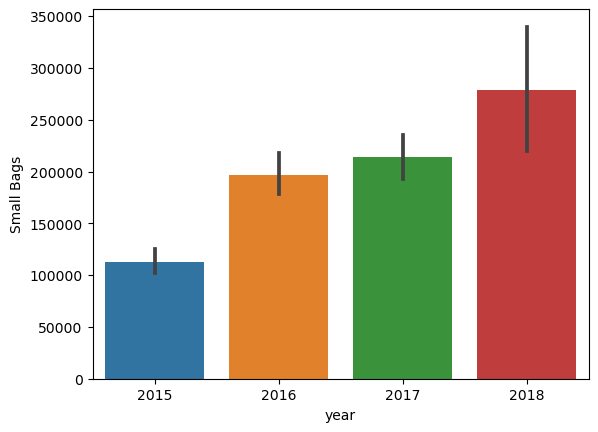

In [40]:
sns.barplot(data = avocado2, x ='year', y ='Small Bags')

<Axes: xlabel='year', ylabel='Large Bags'>

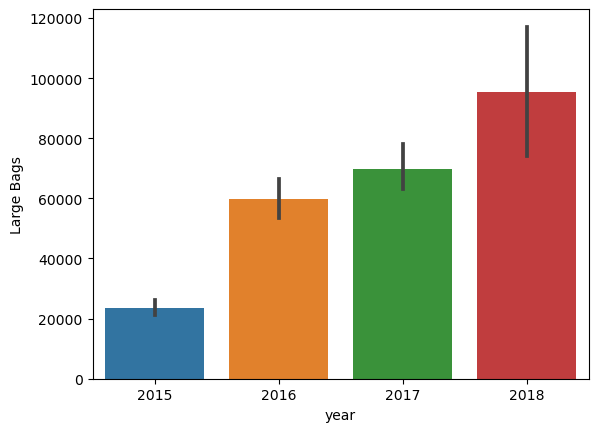

In [41]:
sns.barplot(data = avocado2, x ='year', y ='Large Bags')

<Axes: xlabel='year', ylabel='XLarge Bags'>

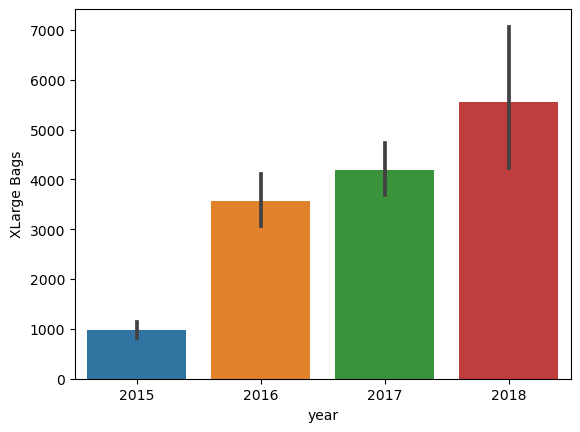

In [42]:
sns.barplot(data = avocado2, x ='year', y ='XLarge Bags')

# sale  of small bags, XLarge Bags and Large Bags of 2018 is higher in compare to other year and from 2015 sale is increasing 

# Type of product on area wise

In [43]:
avocado2.columns

Index(['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags',
       'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year', 'region',
       'Month', 'Week'],
      dtype='object')

In [44]:
year = avocado2['year'].unique()
year

array([2015, 2016, 2017, 2018], dtype=int64)

Text(0.5, 1.0, 'AveragePrice vs. type')

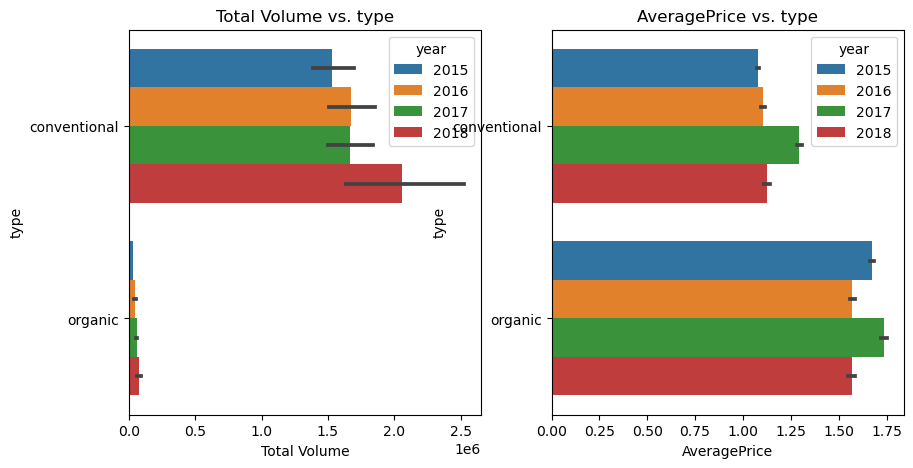

In [45]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))


sns.barplot(x='Total Volume', y='type', data=avocado2, ax=axs[0], hue='year')
axs[0].set_title('Total Volume vs. type')

sns.barplot(x='AveragePrice', y='type', data=avocado2, ax=axs[1], hue='year')
axs[1].set_title('AveragePrice vs. type')

# Price of organic is high in compare to conventional avocado and sale is very low

# price of conventional avocado is low in comparison of organic, and sale is high in compare of organic avocado

# Monthly wise sale of total volume

In [46]:
sale15 = avocado2[avocado2['year'] == 2015]
sale16 = avocado2[avocado2['year'] == 2016]
sale17 = avocado2[avocado2['year'] == 2017]
sale18 = avocado2[avocado2['year'] == 2018]

In [47]:
price2015 = sale15['AveragePrice'].mean()
price2015

1.3755903829029386

In [48]:
price2016 = sale16['AveragePrice'].mean()
price2016

1.3386396011396011

In [49]:
price2017 = sale17['AveragePrice'].mean()
price2017

1.5151275777700104

In [50]:
price2018 = sale18['AveragePrice'].mean()
price2018

1.347530864197531

In [51]:
avocado2['Month'].unique()

array([12, 11, 10,  9,  8,  7,  6,  5,  4,  3,  2,  1], dtype=int64)

In [52]:
year1 = avocado2[avocado2['year'] == 2018]

In [53]:
year1['Month'].value_counts()

3    432
2    432
1    432
Name: Month, dtype: int64

<Axes: xlabel='Month', ylabel='Total Volume'>

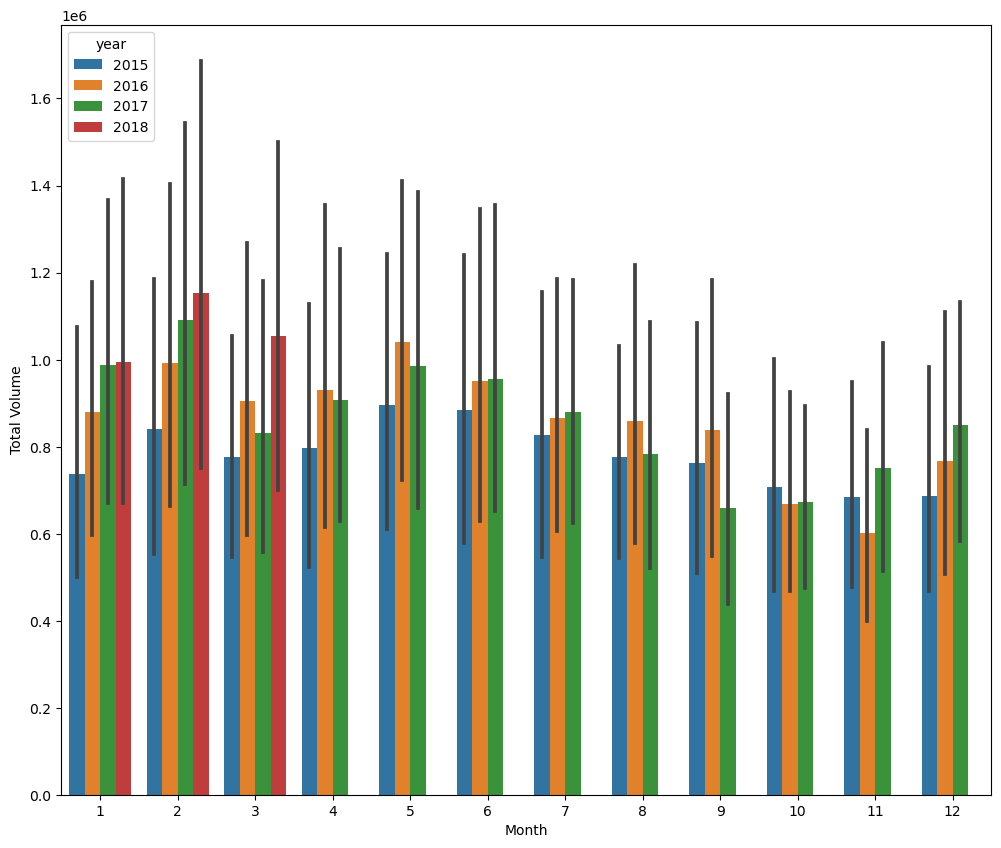

In [54]:
plt.figure(figsize=(12,10))
sns.barplot(data = avocado2, x ='Month', y ='Total Volume', hue='year')

<Axes: xlabel='Month', ylabel='AveragePrice'>

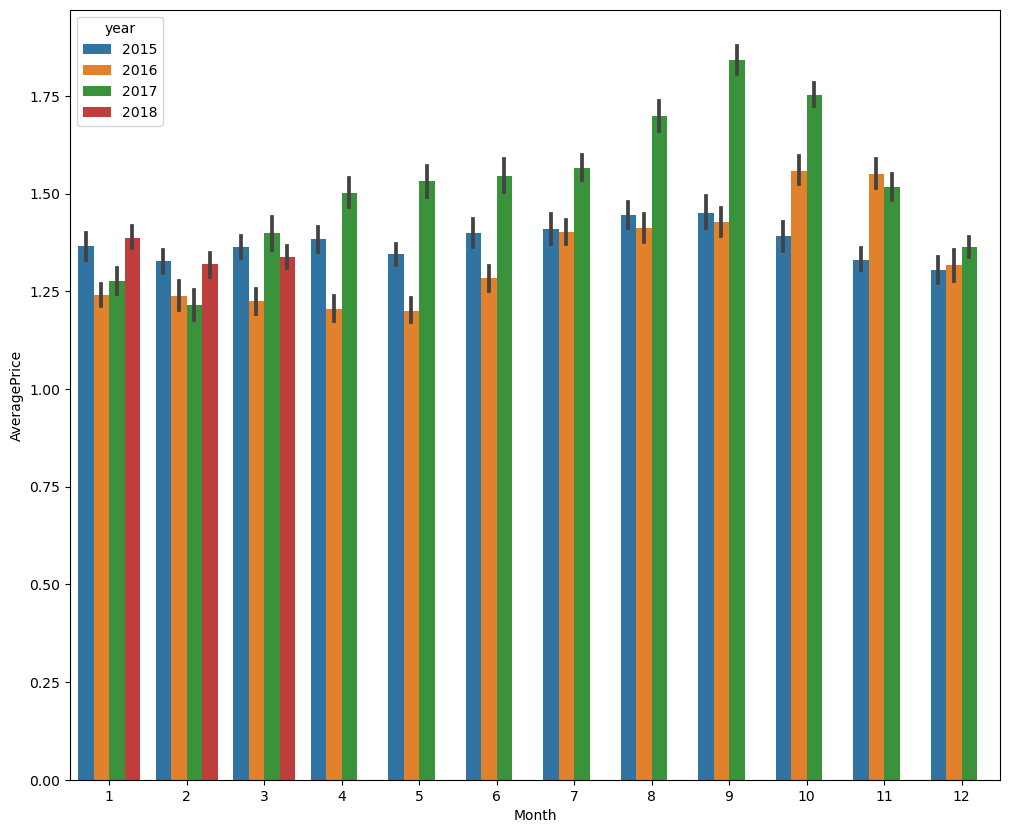

In [55]:
plt.figure(figsize=(12,10))
sns.barplot(data = avocado2, x ='Month', y ='AveragePrice', hue='year')

# Sale in the month of may sale is higher in year 2015
# Sale in the month of may sale is higher in year 2016 and price is lower in same month
# Sale in the month of feburary sale is higher in year 2018 other months in any year
# price  in september month of 2017 is higher, sale is lower in same month
# sale is lower in month of November in 2016, price is higher as compare to other years in same month

# Sale on Typewise and Monthwise and Yearwise

In [56]:
Sale2015 = avocado2[avocado2['year']==2015]

In [57]:
Sale2016 = avocado2[avocado2['year']==2016]

In [58]:
Sale2017 = avocado2[avocado2['year']==2017]

In [59]:
Sale2018 = avocado2[avocado2['year']==2018]

# 2015

<Axes: xlabel='Month', ylabel='Total Volume'>

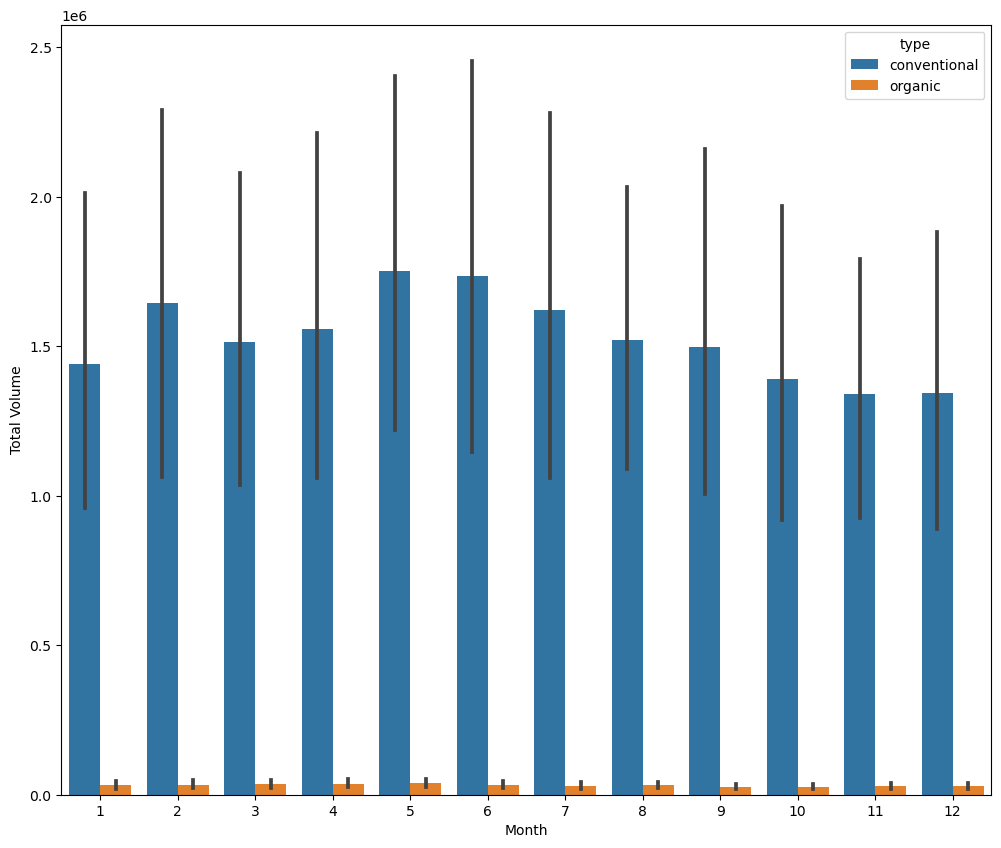

In [60]:
plt.figure(figsize=(12,10))
sns.barplot(data = Sale2015, x ='Month', y ='Total Volume', hue='type')

# 2016

<Axes: xlabel='Month', ylabel='Total Volume'>

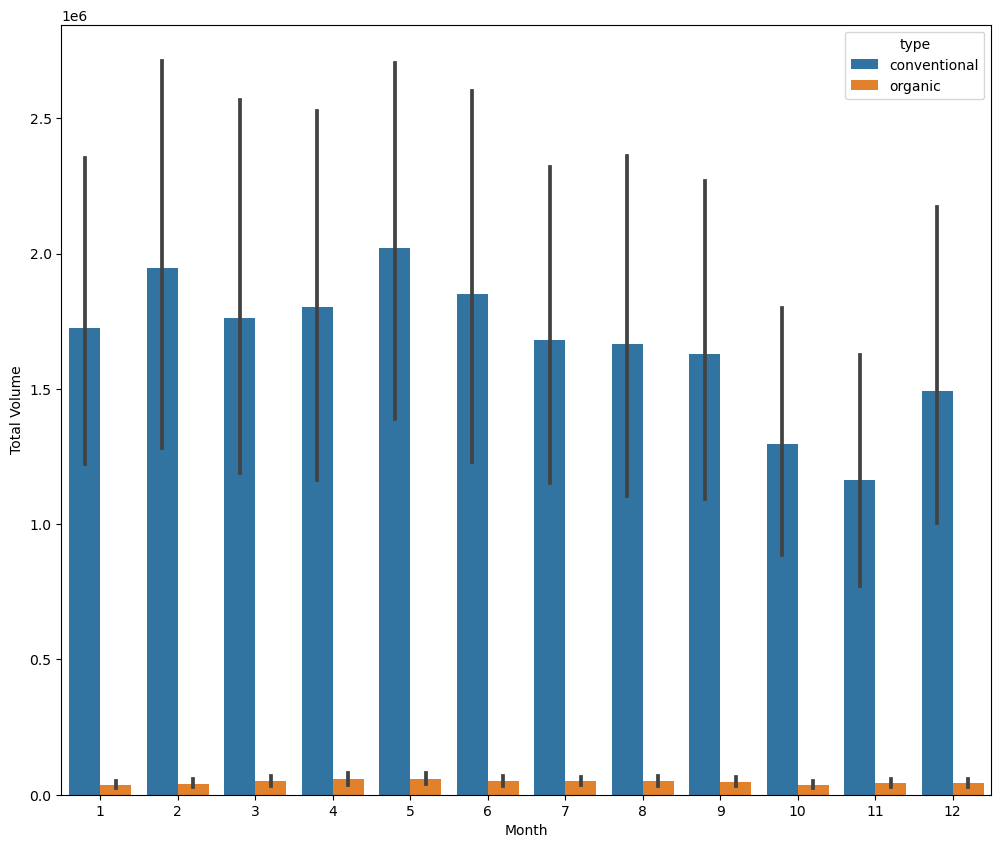

In [61]:
plt.figure(figsize=(12,10))
sns.barplot(data = Sale2016, x ='Month', y ='Total Volume', hue='type')


# 2017

<Axes: xlabel='Month', ylabel='Total Volume'>

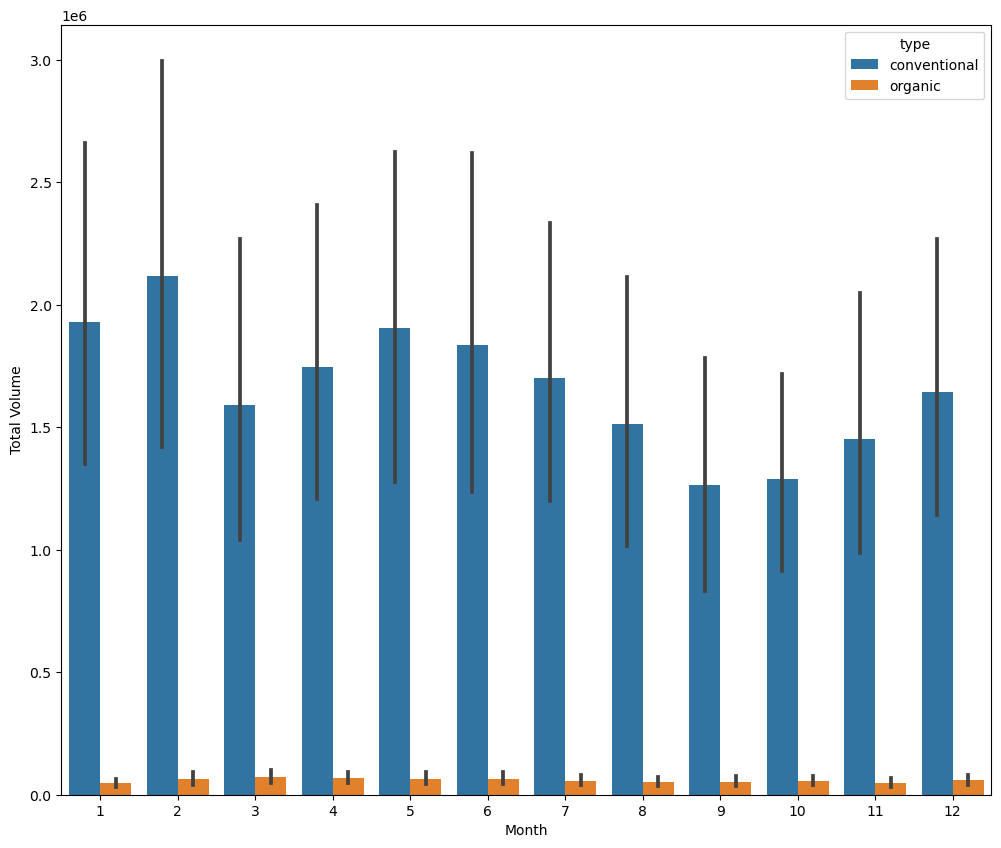

In [62]:
plt.figure(figsize=(12,10))
sns.barplot(data = Sale2017, x ='Month', y ='Total Volume', hue='type')


# 2018

<Axes: xlabel='Month', ylabel='Total Volume'>

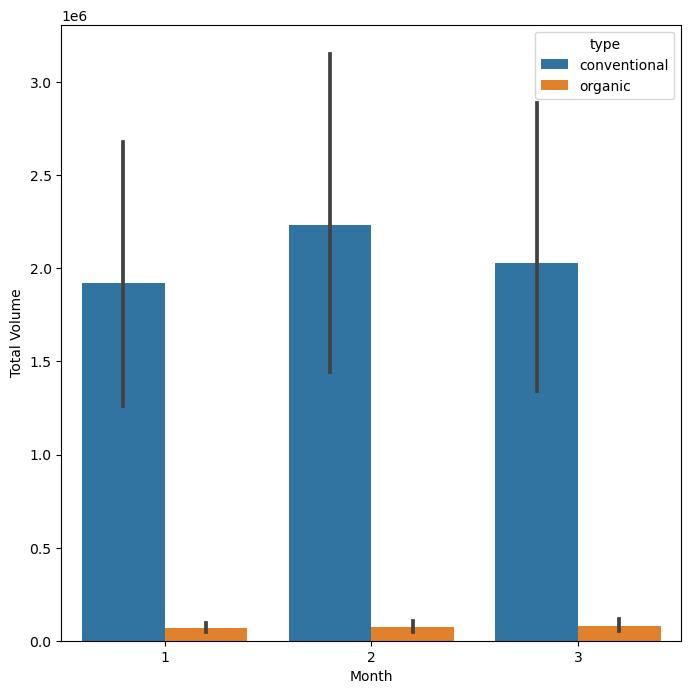

In [63]:
plt.figure(figsize=(8,8))
sns.barplot(data = Sale2018, x ='Month', y ='Total Volume', hue='type')


# As you can see conventional sale of each month is higher than organic in 2015, 2016, 2017 and 2018
# even sale of conventional avocado in month of March, september is very low

# in month of feburary sale of avocado is higher in 2018, 2017

# sale is higher in month of may and june of 2015
# sale is higher in month of may of 2016


# 1) Ordinal Encoder

In [51]:
oe = OrdinalEncoder()

type1 = oe.fit_transform(avocado2['type'].values.reshape(-1,1))
region = oe.fit_transform(avocado2['region'].values.reshape(-1,1))


In [52]:
avocado2['type'] = type1

avocado2['region'] = region

In [53]:
avocado2

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Week
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0.0,2015,0.0,12,52
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0.0,2015,0.0,12,51
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0.0,2015,0.0,12,50
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0.0,2015,0.0,12,49
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0.0,2015,0.0,11,48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,1.0,2018,53.0,2,5
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,1.0,2018,53.0,1,4
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,1.0,2018,53.0,1,3
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,1.0,2018,53.0,1,2


# 2) Transform through Quantile Transformer

In [165]:
x = avocado2.drop(['AveragePrice'], axis=1)
y = avocado2['AveragePrice']

In [166]:
x

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Week
0,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0.0,2015,0.0,12,52
1,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0.0,2015,0.0,12,51
2,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0.0,2015,0.0,12,50
3,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0.0,2015,0.0,12,49
4,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0.0,2015,0.0,11,48
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,1.0,2018,53.0,2,5
18245,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,1.0,2018,53.0,1,4
18246,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,1.0,2018,53.0,1,3
18247,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,1.0,2018,53.0,1,2


# DIstribution of Features

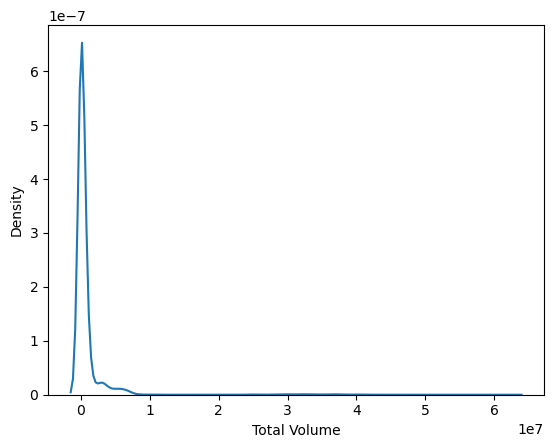

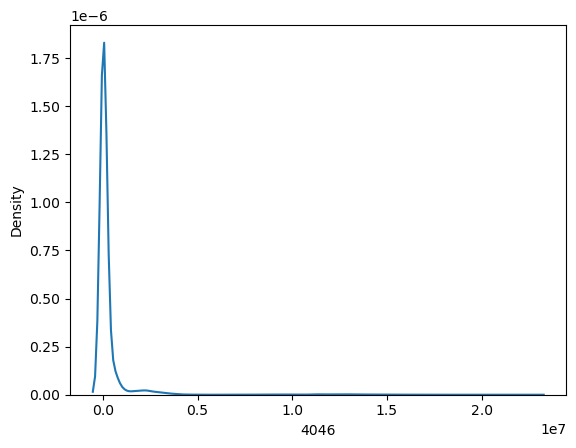

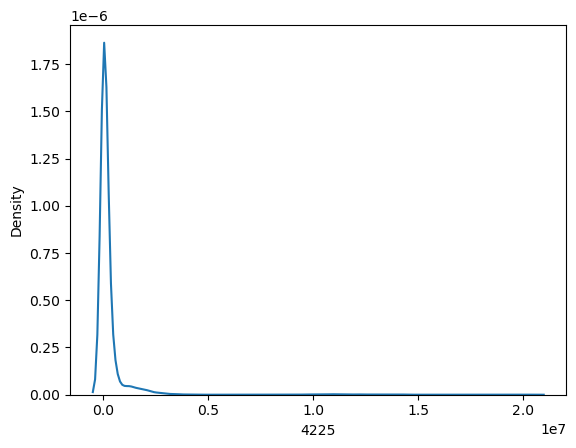

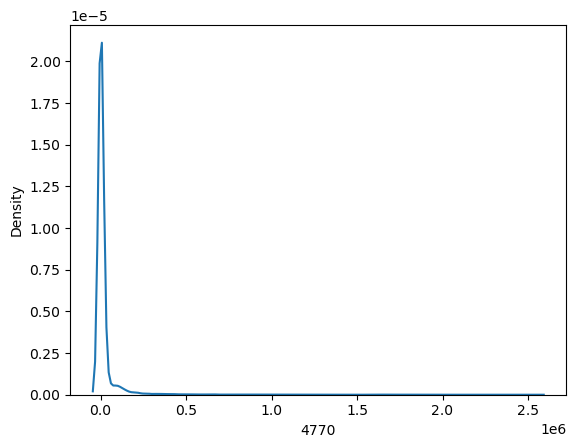

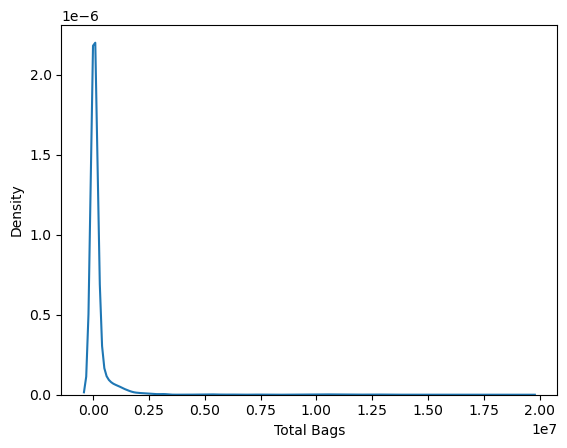

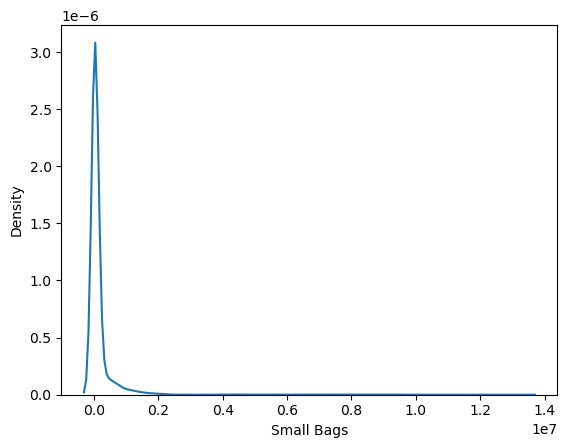

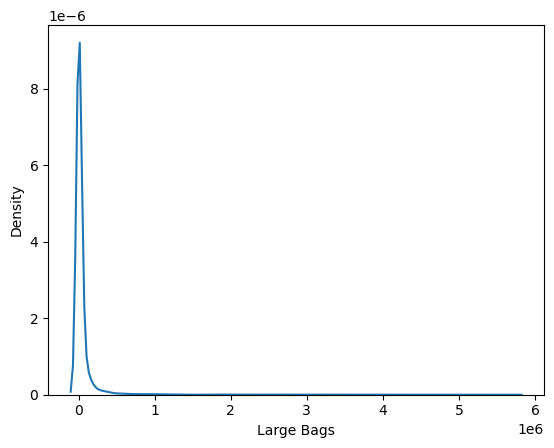

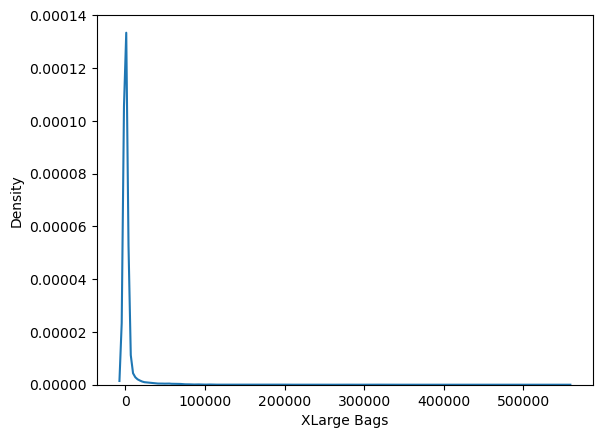

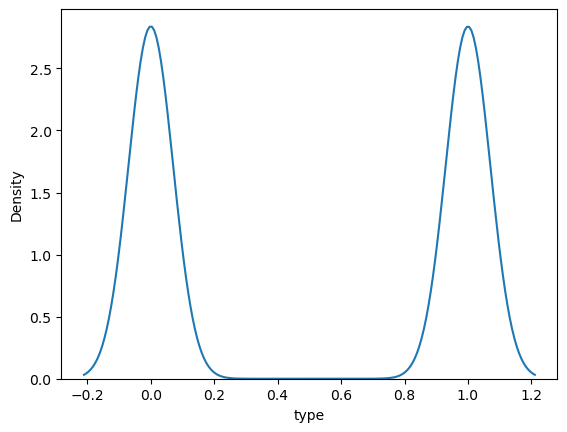

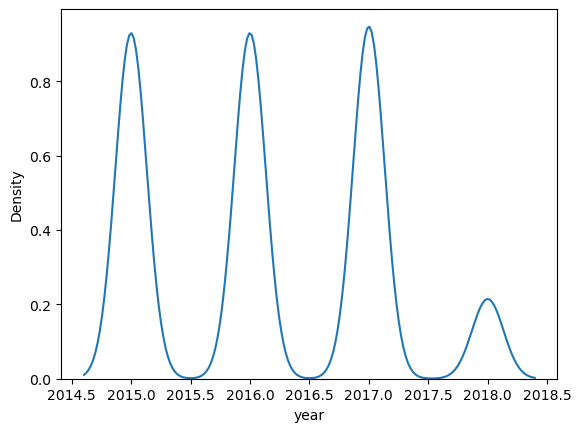

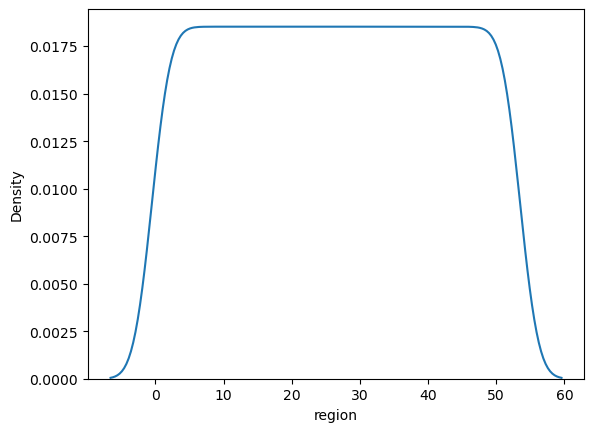

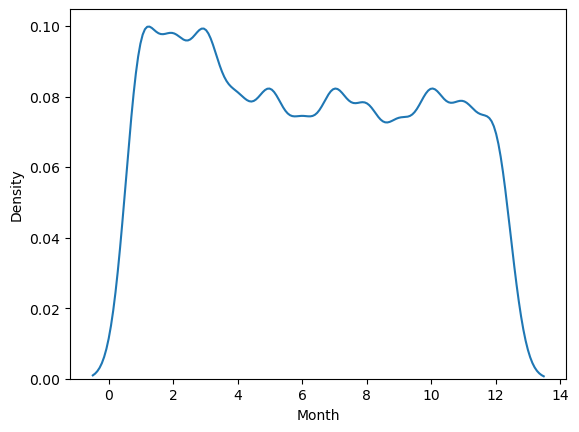

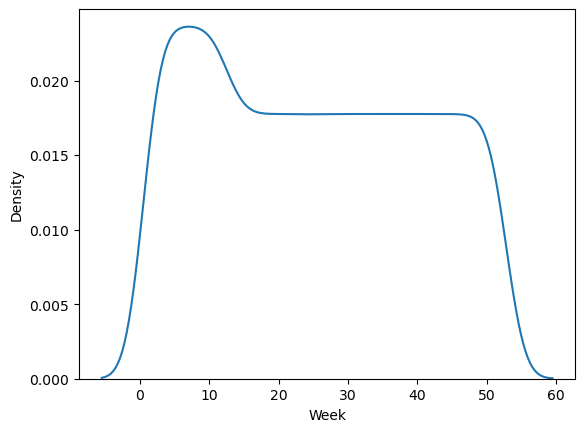

In [173]:
for i in x.columns:
    sns.kdeplot(data=x, x=i)
    plt.show()

# Skewness

In [56]:
x.skew()

Total Volume     9.007687
4046             8.648220
4225             8.942466
4770            10.159396
Total Bags       9.756072
Small Bags       9.540660
Large Bags       9.796455
XLarge Bags     13.139751
type             0.000329
year             0.215339
region           0.000030
Month            0.106617
Week             0.108331
dtype: float64

In [57]:
qt = QuantileTransformer(output_distribution='normal')

In [58]:
x_transformed = pd.DataFrame(qt.fit_transform(x))

# skewness After Transforming through Quantile Transformer

In [59]:
x_transformed.skew()

0    -0.003445
1    -1.039623
2    -0.305506
3    -0.703325
4    -0.095678
5    -0.789176
6    -1.542781
7     0.712727
8     0.000329
9    -0.111501
10    0.005757
11   -0.182803
12   -1.010441
dtype: float64

# StandardScaler

In [60]:
ss = StandardScaler()

In [61]:
x_scaled = pd.DataFrame(ss.fit_transform(x_transformed))

In [62]:
x_scaled.skew()

0    -0.003445
1    -1.039623
2    -0.305506
3    -0.703325
4    -0.095678
5    -0.789176
6    -1.542781
7     0.712727
8     0.000329
9    -0.111501
10    0.005757
11   -0.182803
12   -1.010441
dtype: float64

# Multicollinearity check and removal

<Axes: >

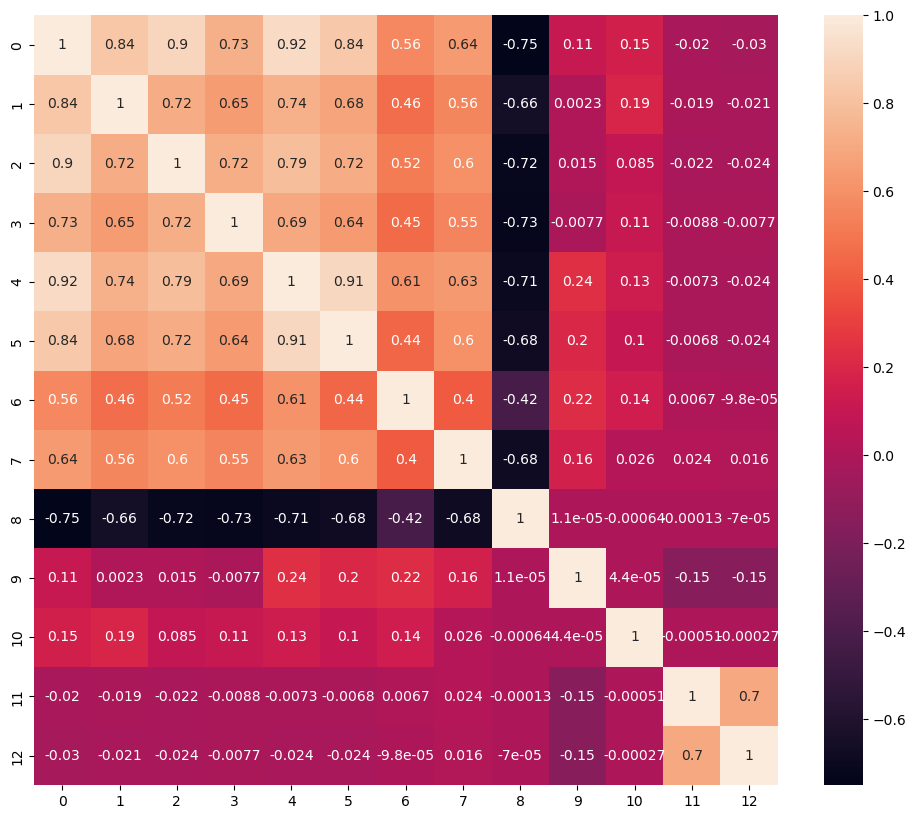

In [63]:
plt.figure(figsize=(12,10))
sns.heatmap(x_scaled.corr(), annot=True)

In [64]:
matrix = x_scaled.corr()

In [65]:
corr_features = set()
for i in range(len(matrix)):
    for j in range(i):
        if abs(matrix.iloc[i,j] > 0.75):
            colname = matrix.columns[i]
            corr_features.add(colname)
            
            

In [66]:
corr_features

{1, 2, 4, 5}

# Feature Selection

In [67]:
rfc = RandomForestRegressor(n_estimators = 340)

In [68]:
from sklearn.feature_selection import VarianceThreshold

In [69]:
Threshold = VarianceThreshold(threshold=0.0)

In [70]:
Threshold.fit(x_scaled)

VarianceThreshold()

In [71]:
Threshold.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True])

# forword Feature Selection

In [72]:
lr = LinearRegression()

In [73]:
from mlxtend.feature_selection import SequentialFeatureSelector

In [76]:
sfs = SequentialFeatureSelector(lr, k_features = 'best')

In [77]:
sfs.fit(x_scaled, y)

SequentialFeatureSelector(estimator=LinearRegression(), k_features=(1, 13),
                          scoring='r2')

In [78]:
features = list(sfs.k_feature_names_)

In [79]:
selected = pd.DataFrame(x_scaled[features])

In [80]:
selected

,0,1,2,3,6,7,8,9,12
0,-0.152636,-0.515283,0.261994,0.364589,-0.125960,-0.71354,-0.999836,-1.363648,1.742792
1,-0.190692,-0.636287,0.174271,0.375225,-0.123862,-0.71354,-0.999836,-1.363648,1.480883
2,0.048051,-0.593966,0.543007,0.430199,-0.120455,-0.71354,-0.999836,-1.363648,1.320037
3,-0.092742,-0.491280,0.383070,0.388785,-0.103365,-0.71354,-0.999836,-1.363648,1.205435
4,-0.205189,-0.547006,0.166799,0.391807,-0.070908,-0.71354,-0.999836,-1.363648,1.113676
...,...,...,...,...,...,...,...,...,...
18244,-0.471365,-0.313993,-0.865490,-1.486204,-0.006237,-0.71354,1.000164,2.035855,-0.939598
18245,-0.552145,-0.476647,-0.583910,-1.486204,-0.031932,-0.71354,1.000164,2.035855,-1.049883
18246,-0.556770,-0.476600,-0.724776,0.547128,-0.172757,-0.71354,1.000164,2.035855,-1.186984
18247,-0.488666,-0.399531,-0.638240,0.547031,-0.162005,-0.71354,1.000164,2.035855,-1.371432


# Distribution After transforming data

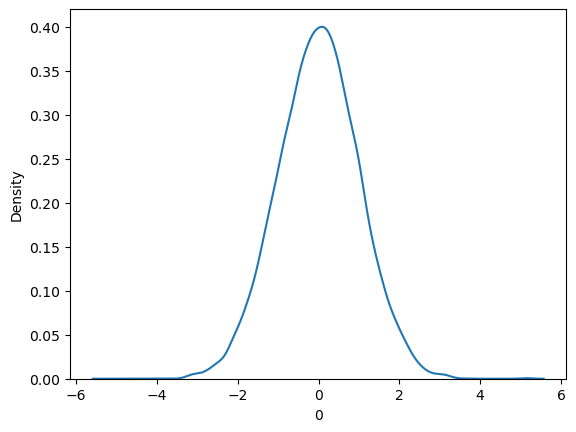

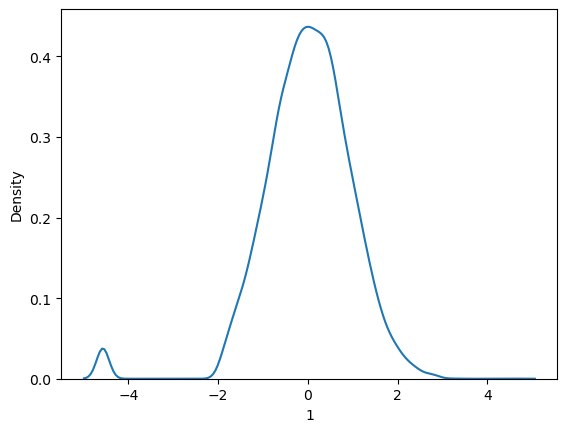

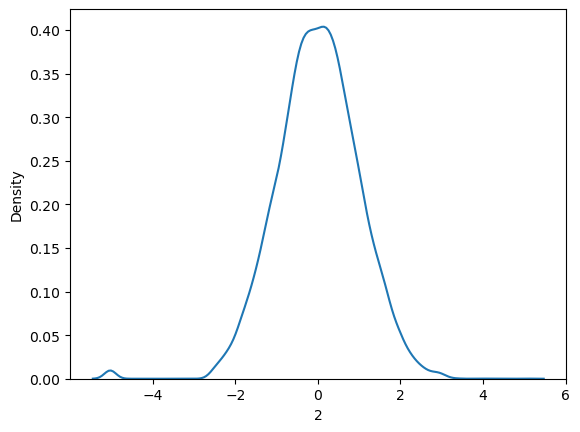

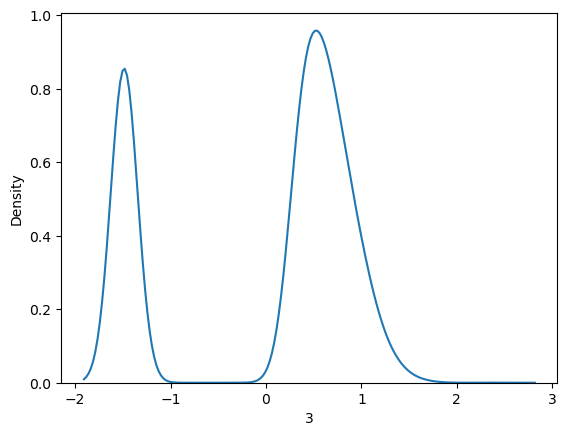

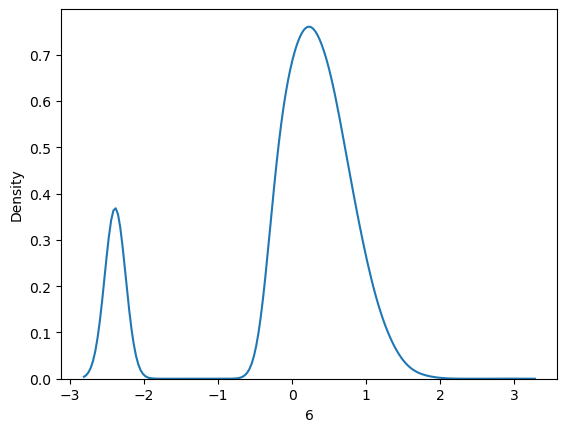

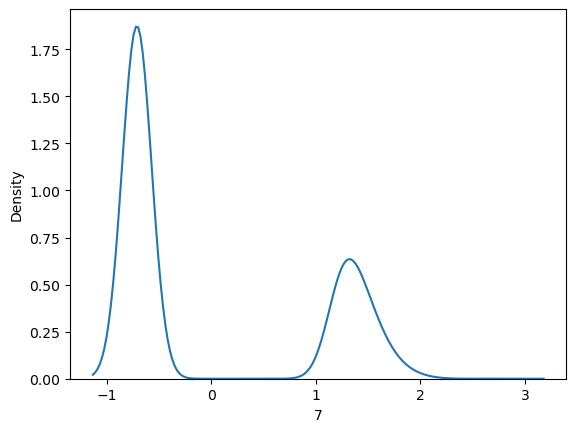

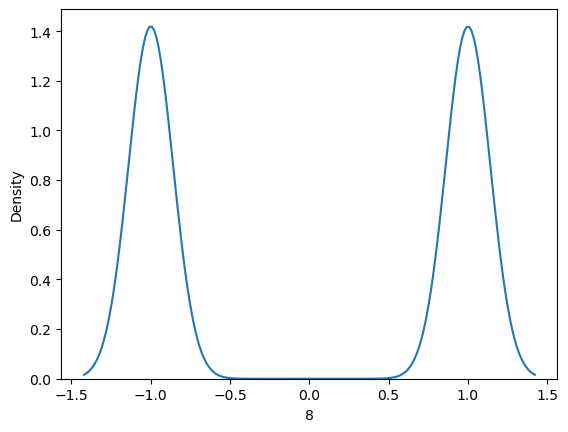

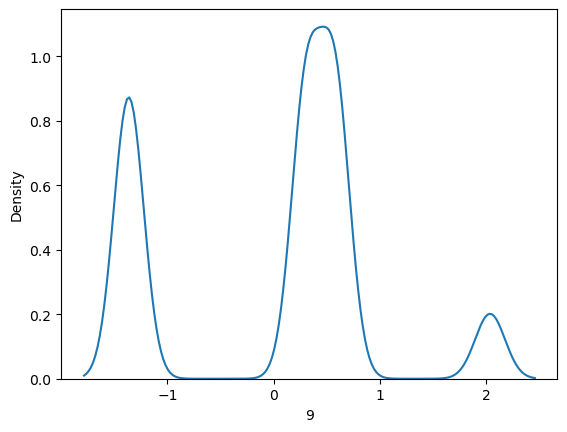

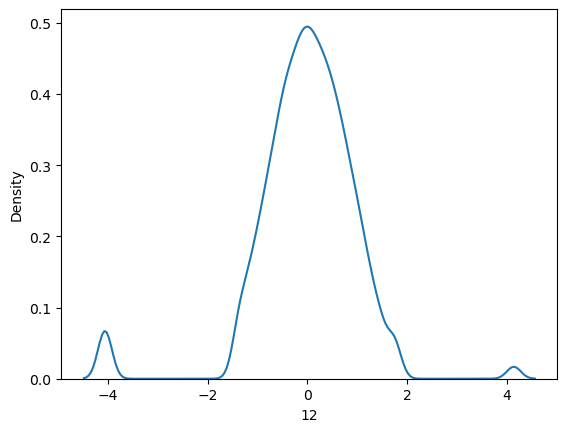

In [176]:
for i in selected.columns:
    sns.kdeplot(data=selected, x=i)
    plt.show()

# Principal Component Analysis

In [81]:
pca = PCA(n_components = 9)

In [82]:
Selected_features = pd.DataFrame(pca.fit_transform(x_scaled))

In [83]:
Selected_features.skew()

0    0.084714
1    0.735239
2    0.330845
3   -0.022804
4    0.704981
5    0.223670
6    0.087049
7    0.694131
8    1.660506
dtype: float64

# DIstribution After applying the Principal Compnent Analysis and getting relevent Featrures

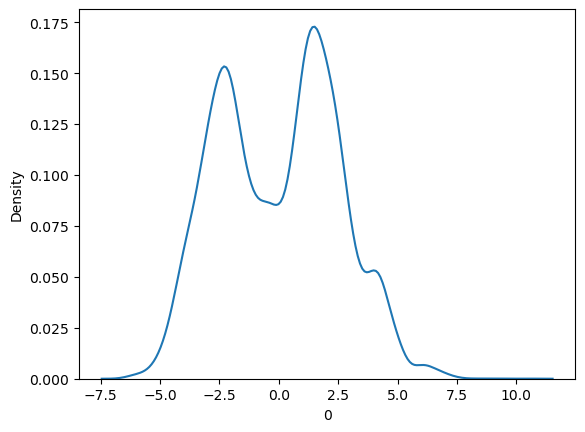

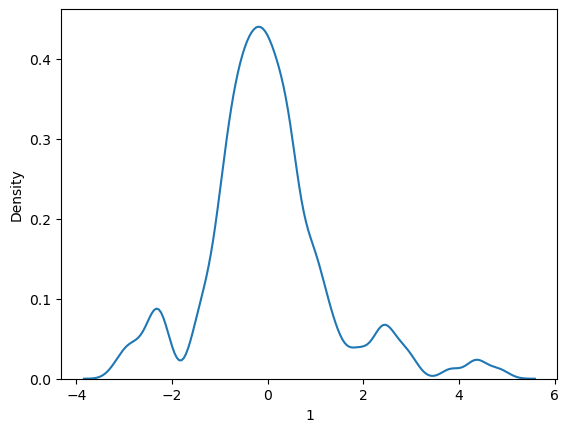

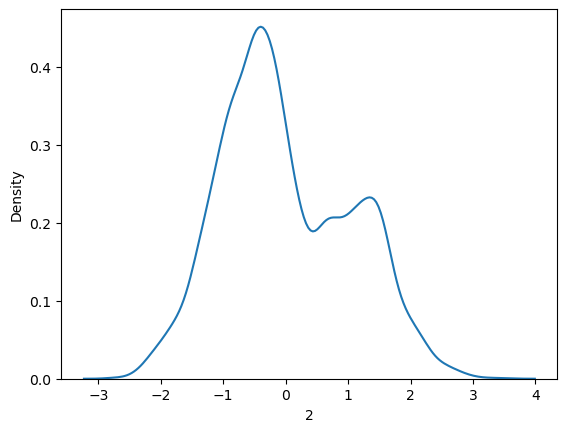

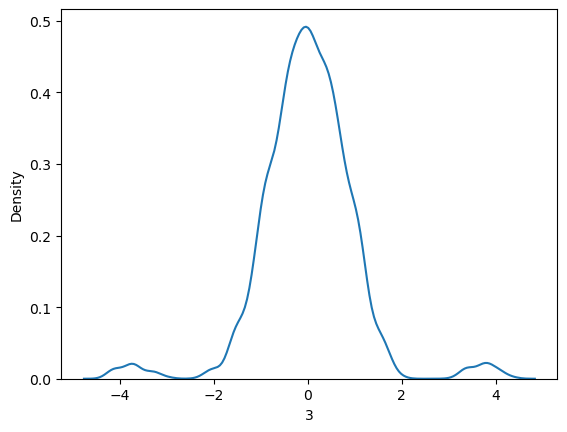

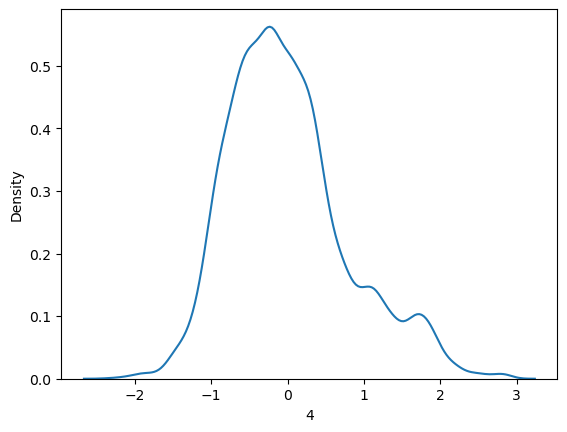

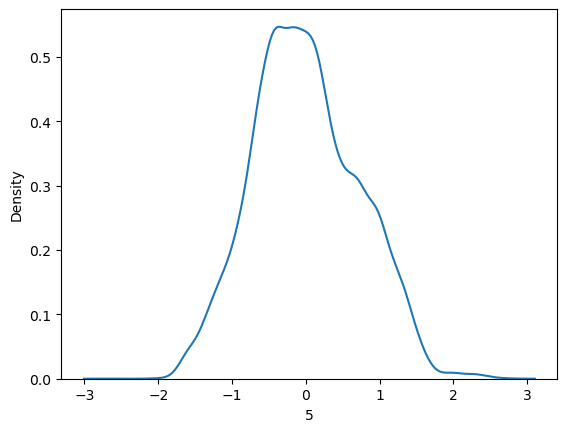

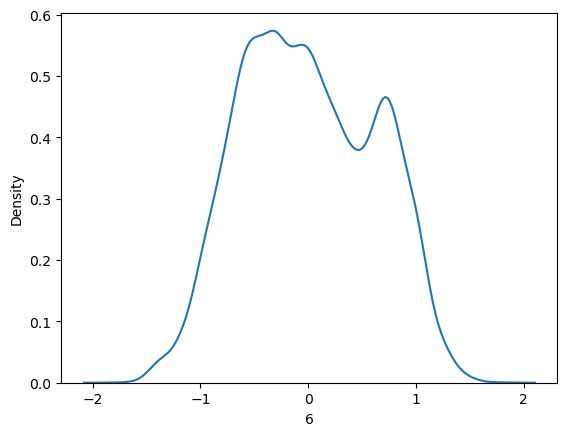

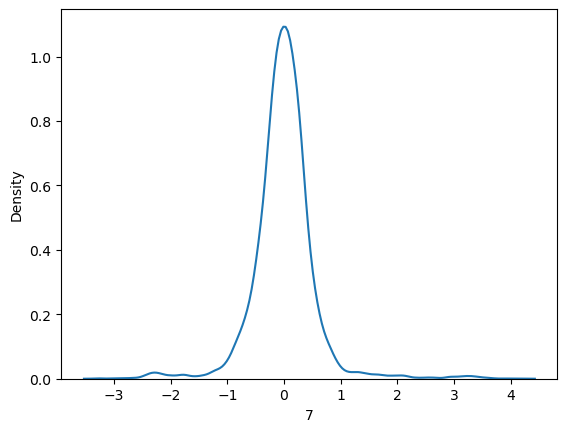

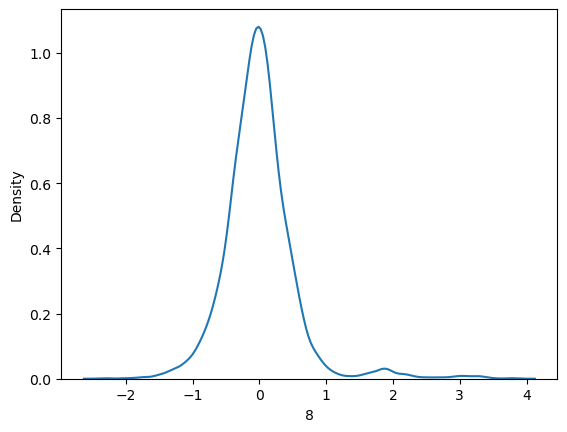

In [177]:
for i in Selected_features.columns:
    sns.kdeplot(data=Selected_features, x=i)
    plt.show()

# here problem of skewness solved 

# Train_Test_Split

In [105]:
x_train,x_test,y_train,y_test = train_test_split(selected, y, test_size=0.25, random_state=42)

# Model_Building

In [108]:
models = {'kbc' : KNeighborsRegressor(), 'rfc' : RandomForestRegressor(), 'ada' : AdaBoostRegressor(), 'ir' : LinearRegression(), 'gbc' : GradientBoostingRegressor(), 'lasso' : Lasso(), 'Ridge' : Ridge(), 'XG' : XGBRegressor(), 'SVR' : SVR()}

In [99]:
for model_name, model in models.items():
    model.fit(x_train, y_train)
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)
    print(',,,,,,,,,,,,,,,,,,,,,,,,,,')
    print(model_name)
    print('Training_R2 Score:', r2_score(y_train, y_train_pred))
    print('Testing_R2 Score:', r2_score(y_test, y_test_pred))
    print('----------------------------------------------------')
    print('Traning_mean_squared_error:', mean_squared_error(y_train, y_train_pred))
    print('Test_mean_squared_error:', mean_squared_error(y_test, y_test_pred))
    print('----------------------------------------------------')
    print('Traning_mean_absolute_error:', mean_absolute_error(y_train, y_train_pred))
    print('Test_mean_absolute_error:', mean_absolute_error(y_test, y_test_pred))
    print('-----------------------------------------------------')
    print('explained_variance_score:', explained_variance_score(y_train, y_train_pred))
    print('explained_variance_score:', explained_variance_score(y_test, y_test_pred))
    
    

,,,,,,,,,,,,,,,,,,,,,,,,,,
kbc
Training_R2 Score: 0.8964980384149833
Testing_R2 Score: 0.8318577292516106
----------------------------------------------------
Traning_mean_squared_error: 0.016808859564518486
Test_mean_squared_error: 0.027121156256848567
----------------------------------------------------
Traning_mean_absolute_error: 0.087588922986994
Test_mean_absolute_error: 0.1135126013587552
-----------------------------------------------------
explained_variance_score: 0.8966854602510405
explained_variance_score: 0.8323210414242218
,,,,,,,,,,,,,,,,,,,,,,,,,,
rfc
Training_R2 Score: 0.981417922002865
Testing_R2 Score: 0.8625918466766389
----------------------------------------------------
Traning_mean_squared_error: 0.0030177547815285677
Test_mean_squared_error: 0.022163778213894366
----------------------------------------------------
Traning_mean_absolute_error: 0.0374662428759316
Test_mean_absolute_error: 0.10271959237343851
-----------------------------------------------------
ex

In [109]:
models = {'kbc' : KNeighborsRegressor(), 'rfc' : RandomForestRegressor(), 'ada' : AdaBoostRegressor(), 'ir' : LinearRegression(), 'gbc' : GradientBoostingRegressor(), 'lasso' : Lasso(), 'Ridge' : Ridge(), 'XG' : XGBRegressor(), 'SVR' : SVR()}

In [100]:
for model_name, model in models.items():
    score =cross_val_score(model, x_train, y_train)
    score1 =cross_val_score(model, x_test, y_test)
    print(model_name,'score is', np.mean(score))
    print(model_name,'score is', np.mean(score1))
    print('.................................')
    

kbc score is 0.8116802943274207
kbc score is 0.7045125051922418
.................................
rfc score is 0.8548243503811568
rfc score is 0.784363976549167
.................................
ada score is 0.5505811989332411
ada score is 0.5473726932755087
.................................
ir score is 0.4987352425301719
ir score is 0.489446707904419
.................................
gbc score is 0.7150762324690423
gbc score is 0.69517045730668
.................................
lasso score is -0.0006534482894210214
lasso score is -0.0016622775235869192
.................................
Ridge score is 0.4987365262818918
Ridge score is 0.4894531508226251
.................................
XG score is 0.8455454865615536
XG score is 0.7987984609634616
.................................
SVR score is 0.7171643565921737
SVR score is 0.6737480798061879
.................................


# Best Model 

In [131]:
rfe = RandomForestRegressor()

In [132]:
rfe.fit(x_train, y_train)

RandomForestRegressor()

In [133]:
y_pred_train = rfe.predict(x_train)
y_pred_test = rfe.predict(x_test)

In [134]:
print('Training_R2 Score:', r2_score(y_train, y_pred_train))
print('Testing_R2 Score:', r2_score(y_test, y_pred_test))

Training_R2 Score: 0.9815954734575881
Testing_R2 Score: 0.8634234338062414


In [135]:
print('Traning_mean_squared_error:', mean_squared_error(y_train, y_pred_train))
print('Test_mean_squared_error:', mean_squared_error(y_test, y_pred_test))

Traning_mean_squared_error: 0.0029889201833990927
Test_mean_squared_error: 0.02202964415954416


# Hyperparameter tuning

In [110]:
rfe = RandomForestRegressor()

In [111]:
para = {'n_estimators': [100,150,200,250,300,350,400],
       'max_depth': [2,3,6,8,10,12,15,14,16,18],
       'min_samples_split': [1,2,3,4,5,6,7,8],
       'max_features': [4,5,6,7,8,9,10]}

In [95]:
rscv = RandomizedSearchCV(rfe, param_distributions = para, cv=5, n_jobs = 2, random_state = 42)

In [96]:
rscv.fit(x_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=2,
                   param_distributions={'max_depth': [2, 3, 6, 8, 10, 12, 15,
                                                      14, 16, 18],
                                        'max_features': [4, 5, 6, 7, 8, 9, 10],
                                        'min_samples_split': [1, 2, 3, 4, 5, 6,
                                                              7, 8],
                                        'n_estimators': [100, 150, 200, 250,
                                                         300, 350, 400]},
                   random_state=42)

In [98]:
rscv.best_params_

{'n_estimators': 400,
 'min_samples_split': 3,
 'max_features': 8,
 'max_depth': 18}

# Best Model after Hyperparameter tuning

In [136]:
rfe1 = RandomForestRegressor(n_estimators = 400, min_samples_split = 3, max_features = 8, max_depth = 18)

In [137]:
rfe1.fit(x_train, y_train)

RandomForestRegressor(max_depth=18, max_features=8, min_samples_split=3,
                      n_estimators=400)

In [138]:
y_pred_train3 = rfe1.predict(x_train)
y_pred_test3 = rfe1.predict(x_test)

In [139]:
print('accuracy_score', r2_score(y_pred_train3, y_train))
print('accuracy_score', r2_score(y_pred_test3, y_test))

accuracy_score 0.9751542724883276
accuracy_score 0.8299336978844348


# Classification  Model

In [4]:
avocado 

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [5]:
# Feature enngineering of date column 
avocado['Date'] = pd.to_datetime(avocado['Date'])
avocado['Month'] = avocado['Date'].dt.month
avocado['Week'] = avocado['Date'].dt.week

In [6]:
# Droping Unnecessary Columns
avocodo2  = avocado.drop(['Unnamed: 0','Date'], axis=1)

In [7]:
# Division into x and y

In [10]:
x = avocodo2.drop(['region'], axis=1)
y = avocodo2['region']

# Encoding through Dummies

In [11]:
encoded = pd.get_dummies(x['type'], drop_first=True)

In [12]:
x['type'] = encoded

In [13]:
x

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,Month,Week
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,12,52
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,12,51
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015,12,50
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015,12,49
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015,11,48
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,1,2018,2,5
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,1,2018,1,4
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,1,2018,1,3
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,1,2018,1,2


# Label Encoder 

In [14]:
le = LabelEncoder()
Y = le.fit_transform(y)

In [15]:
Y

array([ 0,  0,  0, ..., 53, 53, 53])

# Skewness check 

In [16]:
x.skew()

AveragePrice     0.580303
Total Volume     9.007687
4046             8.648220
4225             8.942466
4770            10.159396
Total Bags       9.756072
Small Bags       9.540660
Large Bags       9.796455
XLarge Bags     13.139751
type             0.000329
year             0.215339
Month            0.106617
Week             0.108331
dtype: float64

In [328]:
# Multicollinearity Check

<Axes: >

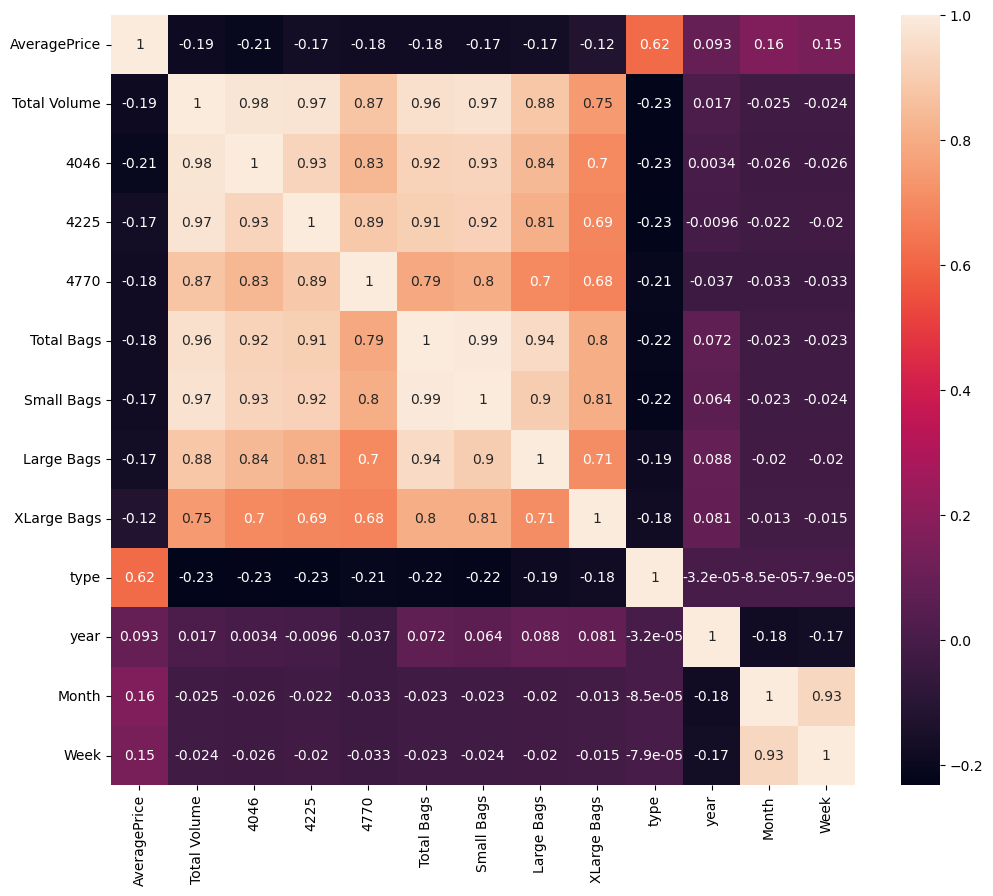

In [17]:
plt.figure(figsize=(12,10))
sns.heatmap(x.corr(), annot=True)

# 2) Transformer through Power Transformer and Other

In [18]:
pt = PowerTransformer(method='yeo-johnson', standardize=True)

In [19]:
x_transform = pd.DataFrame(pt.fit_transform(x))

In [20]:
x_transform

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,-0.086248,-0.086605,-0.658619,0.307313,-0.247250,-0.524004,-0.340627,-0.773351,-0.699849,-0.999836,-1.221895,1.494347,1.524709
1,-0.034022,-0.155746,-0.776870,0.231647,-0.201041,-0.485890,-0.306425,-0.763435,-0.699849,-0.999836,-1.221895,1.494347,1.478352
2,-1.273938,0.179327,-0.731947,0.579503,-0.007072,-0.552018,-0.366303,-0.750820,-0.699849,-0.999836,-1.221895,1.494347,1.431654
3,-0.793421,0.003876,-0.634200,0.415100,-0.148322,-0.695449,-0.496853,-0.691865,-0.699849,-0.999836,-1.221895,1.494347,1.384604
4,-0.219440,-0.187640,-0.685293,0.224806,-0.137918,-0.669157,-0.477201,-0.600975,-0.699849,-0.999836,-1.221895,1.278438,1.337192
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,0.640729,-0.674587,-0.467366,-0.919470,-1.238310,-0.334466,-0.178839,-0.410859,-0.699849,1.000164,1.968548,-1.220706,-1.406523
18245,0.816307,-0.767550,-0.619883,-0.665372,-1.238310,-0.496897,-0.325977,-0.481465,-0.699849,1.000164,1.968548,-1.642047,-1.516423
18246,1.147790,-0.771505,-0.619831,-0.772496,0.401546,-0.490952,-0.308728,-0.943486,-0.699849,1.000164,1.968548,-1.642047,-1.635129
18247,1.265876,-0.698077,-0.550282,-0.710543,0.401246,-0.424252,-0.248932,-0.908510,-0.699849,1.000164,1.968548,-1.642047,-1.765900


In [334]:
x_transform.skew()

0     0.005596
1     0.011171
2    -0.022679
3    -0.017740
4     0.032184
5    -0.001626
6     0.007058
7    -0.073809
8     0.793520
9     0.000329
10    0.213156
11   -0.146584
12   -0.214566
dtype: float64

<Axes: >

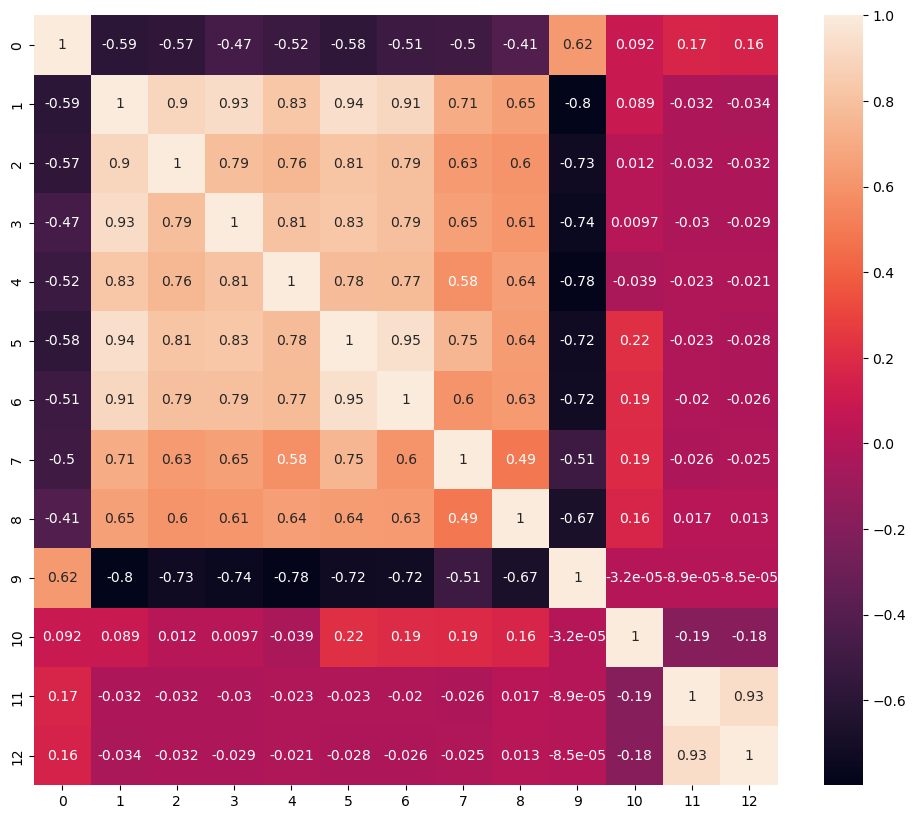

In [21]:
plt.figure(figsize=(12,10))
sns.heatmap(x_transform.corr(), annot=True)

# Principal Analysis Components

In [22]:
pca = PCA(n_components=10)

In [23]:
selected = pd.DataFrame(pca.fit_transform(x_transform))

# Standard Scaler

In [24]:
ss = StandardScaler()

In [25]:
x_scaled = pd.DataFrame(ss.fit_transform(selected))

<Axes: >

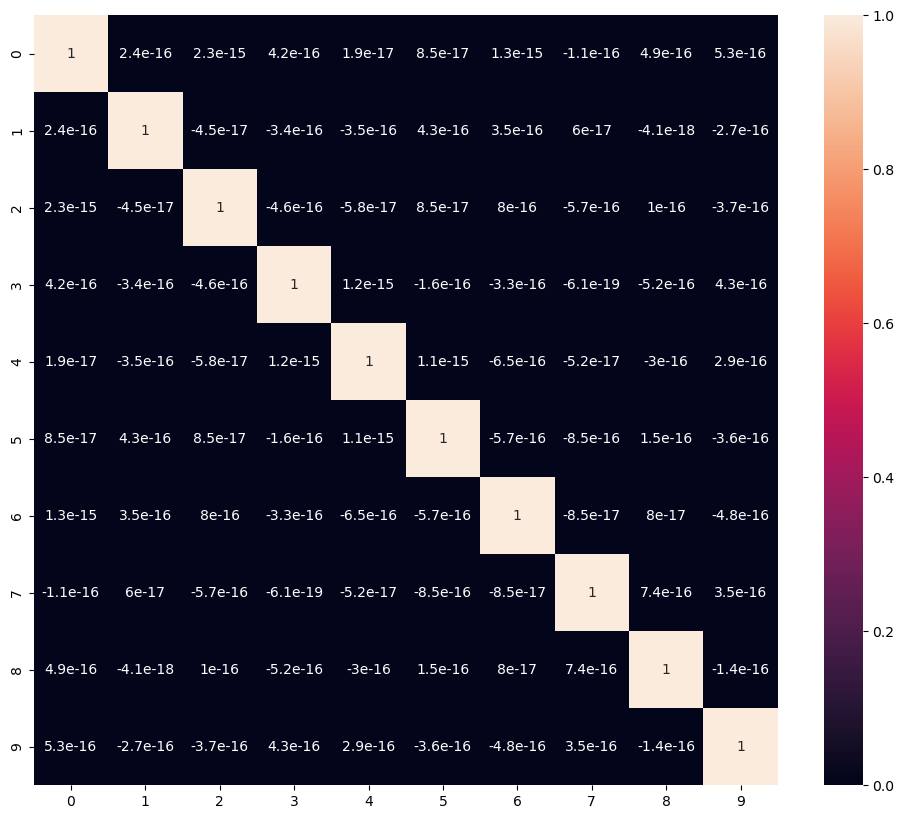

In [26]:
plt.figure(figsize=(12,10))
sns.heatmap(x_scaled.corr(), annot=True, )

# train_test_split

In [140]:
X_train, X_test, Y_train, Y_test = train_test_split(x_scaled, Y, test_size=0.25, random_state=42)

In [141]:
models = {'kbc' : KNeighborsClassifier(), 'rfc' : RandomForestClassifier(), 'ada' : AdaBoostClassifier(), 'ir' : LogisticRegression(), 'gbc' : GradientBoostingClassifier(), 'XG' : XGBClassifier(), 'SVC' : SVC()}

# Model Building

In [29]:
for model_name, model in models.items():
    model.fit(X_train, Y_train)
    y_train_pred1 = model.predict(X_train)
    y_test_pred1 = model.predict(X_test)
    print(',,,,,,,,,,,,,,,,,,,,,,,,,,')
    print(model_name)
    print('Training_accuracy Score:', accuracy_score(Y_train, y_train_pred1))
    print('Testing_accuracy Score:', accuracy_score(Y_test, y_test_pred1))
    print('----------------------------------------------------')
    print(confusion_matrix(Y_train, y_train_pred1))
    print(confusion_matrix(Y_test, y_test_pred1))
    print('----------------------------------------------------')
   

,,,,,,,,,,,,,,,,,,,,,,,,,,
kbc
Training_accuracy Score: 0.9056700277655999
Testing_accuracy Score: 0.8281832127985974
----------------------------------------------------
[[249   0   0 ...   0   0   0]
 [  0 229   0 ...   0   0   1]
 [  0   0 255 ...   0   0   0]
 ...
 [  0   0   0 ... 261   0   0]
 [  0   0   0 ...   1 253   0]
 [  0   1   2 ...   0   0 221]]
[[69  0  0 ...  0  0  0]
 [ 0 71  0 ...  0  0  0]
 [ 0  0 77 ...  0  0  0]
 ...
 [ 0  0  0 ... 77  0  0]
 [ 0  0  0 ...  0 79  0]
 [ 0  0  2 ...  0  0 63]]
----------------------------------------------------
,,,,,,,,,,,,,,,,,,,,,,,,,,
rfc
Training_accuracy Score: 1.0
Testing_accuracy Score: 0.8851632697786544
----------------------------------------------------
[[262   0   0 ...   0   0   0]
 [  0 253   0 ...   0   0   0]
 [  0   0 258 ...   0   0   0]
 ...
 [  0   0   0 ... 261   0   0]
 [  0   0   0 ...   0 258   0]
 [  0   0   0 ...   0   0 256]]
[[70  0  0 ...  0  0  0]
 [ 0 71  0 ...  0  0  0]
 [ 0  0 77 ...  0  0  0]
 ...


# Cross Validation 

In [163]:
for model_name, model in models.items():
    score =cross_val_score(model, X_train, Y_train)
    score1 =cross_val_score(model, X_test, Y_test)
    print(model_name,'score is', np.mean(score))
    print(model_name,'score is', np.mean(score1))
    print('.................................')
    

kbc score is 0.8038146995705577
kbc score is 0.6410253454007416
.................................
rfc score is 0.994008491699789
rfc score is 0.9866312138506178
.................................
ada score is 0.08007941385974152
ada score is 0.20401342210949056
.................................
ir score is 0.8080519024391286
ir score is 0.7352621010357219
.................................
gbc score is 0.9998538812736643
gbc score is 0.9995618838992332
.................................
XG score is 1.0
XG score is 0.9995618838992332
.................................
SVC score is 0.850576882069244
SVC score is 0.6765278818623778
.................................


# Hyperparameter Tuning

In [149]:
rfe2 = RandomForestClassifier()

In [150]:
para = {'n_estimators': [100,150,200,250,300,350,400],
       'max_depth': [2,3,6,8,10,12,15,14,16,18],
       'min_samples_split': [1,2,3,4,5,6,7,8],
       'max_features': [4,5,6,7,8,9,10]}

In [152]:
rscv1 = RandomizedSearchCV(rfe, param_distributions = para, cv=5, n_jobs = 2, random_state = 42)

In [153]:
rscv1.fit(X_train, Y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=2,
                   param_distributions={'max_depth': [2, 3, 6, 8, 10, 12, 15,
                                                      14, 16, 18],
                                        'max_features': [4, 5, 6, 7, 8, 9, 10],
                                        'min_samples_split': [1, 2, 3, 4, 5, 6,
                                                              7, 8],
                                        'n_estimators': [100, 150, 200, 250,
                                                         300, 350, 400]},
                   random_state=42)

In [154]:
rscv1.best_params_

{'n_estimators': 100,
 'min_samples_split': 6,
 'max_features': 10,
 'max_depth': 16}

# Best Model after Hyperparameter tuning

In [155]:
rfe2 = RandomForestClassifier(n_estimators = 100, min_samples_split = 6, max_features = 10, max_depth = 16)

In [156]:
rfe2.fit(X_train, Y_train)

RandomForestClassifier(max_depth=16, max_features=10, min_samples_split=6)

In [157]:
y_pred_train4 = rfe2.predict(X_train)
y_pred_test4 = rfe2.predict(X_test)

In [158]:
print('Training_accuracy Score:', accuracy_score(Y_train, y_pred_train4))
print('Testing_accuracy Score:', accuracy_score(Y_test, y_pred_test4))

Training_accuracy Score: 1.0
Testing_accuracy Score: 1.0


# Cross_val_score

In [161]:
score7 =cross_val_score(rfe2, X_train, Y_train)
score10 =cross_val_score(rfe2, X_test, Y_test)
print(model_name,'score is', np.mean(score7))


gbc score is 0.9999269272926561


In [162]:
print(model_name,'score is', np.mean(score10))

gbc score is 0.9997809419496166
